# PHM Data Challenge 2014

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from collections import Counter

## Data Loading

In [3]:
consumption = pd.read_csv("../data/Train - Part Consumption.csv")

consumption.head()

Asset  Time Reason     Part  Quantity
0  A311482     0   R417  P361646       1.0
1  A174613     0   R707  P991287       1.0
2  A174613     0   R707  P169319       1.0
3  A060723     0   R193  P184448       0.0
4  A174613     0   R707  P097048       1.0

In [4]:
usage = pd.read_csv("../data/Train - Usage.csv")
usage.head()

Asset  Time           Use
0  A403193     5  31194.652034
1  A403193    17  31223.536355
2  A403193    56  31362.706261
3  A403193   124  31701.440562
4  A403193   144  31724.489666

In [5]:
failures = pd.read_csv("../data/Train - Failures.csv")
failures.head()

Asset  Time
0  A403193   137
1  A403193   146
2  A403193   155
3  A403193   229
4  A403193   420

## Data Analysis

In [6]:
consumption.describe()

Time       Quantity
count  270830.000000  270830.000000
mean      378.872691       3.565059
std       212.522371      20.420610
min         0.000000     -15.000000
25%       195.000000       1.000000
50%       388.000000       1.000000
75%       567.000000       2.000000
max       730.000000    3000.000000

In [7]:
usage.describe()

Time            Use
count  22828.000000   22828.000000
mean     374.998730   30273.978469
std      211.670945    2528.890997
min        0.000000   25740.475447
25%      194.000000   28471.064870
50%      377.000000   30516.599911
75%      562.000000   31878.612314
max      730.000000  187239.128532

In [8]:
failures.describe()

Time
count  9199.000000
mean    379.170345
std     210.243071
min       0.000000
25%     199.000000
50%     389.000000
75%     563.000000
max     730.000000

In [9]:
c = Counter(consumption.Reason)
reason_count = c.most_common()
reason_count

[('R707', 136714),
 ('R565', 58284),
 ('R193', 39668),
 ('R417', 12960),
 ('R446', 11090),
 ('R364', 7056),
 ('R119', 2143),
 ('R783', 1858),
 ('R044', 393),
 ('R606', 349),
 ('R575', 262),
 ('R064', 42),
 ('R396', 10),
 ('R782', 1)]

In [10]:
c = Counter(failures.Asset)
failures_count = c.most_common()
failures_count

[('A624962', 19),
 ('A344737', 19),
 ('A546754', 17),
 ('A396638', 17),
 ('A613089', 17),
 ('A196573', 17),
 ('A288494', 16),
 ('A122955', 16),
 ('A130356', 16),
 ('A968343', 16),
 ('A838297', 16),
 ('A073164', 16),
 ('A067512', 16),
 ('A824908', 15),
 ('A748065', 15),
 ('A354676', 15),
 ('A599433', 15),
 ('A689043', 15),
 ('A278781', 15),
 ('A943170', 14),
 ('A181324', 14),
 ('A175822', 14),
 ('A203444', 14),
 ('A402608', 14),
 ('A744243', 14),
 ('A317141', 14),
 ('A446813', 14),
 ('A592525', 14),
 ('A547881', 14),
 ('A550035', 14),
 ('A024432', 14),
 ('A621532', 14),
 ('A531932', 13),
 ('A399220', 13),
 ('A367237', 13),
 ('A333832', 13),
 ('A499073', 13),
 ('A926119', 13),
 ('A283388', 13),
 ('A250298', 13),
 ('A152340', 13),
 ('A733174', 13),
 ('A496983', 13),
 ('A616364', 13),
 ('A429540', 13),
 ('A519059', 13),
 ('A355669', 13),
 ('A558858', 12),
 ('A920271', 12),
 ('A439865', 12),
 ('A457170', 12),
 ('A010961', 12),
 ('A989821', 12),
 ('A423193', 12),
 ('A210011', 12),
 ('A481735

## Data Preprocessing

In [11]:
indexes = consumption.query("Quantity <= 0").index
consumption.drop(indexes, inplace=True)
consumption.reset_index(inplace=True)

In [12]:
consumption.Quantity.describe()

count    266137.000000
mean          3.628079
std          20.594277
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        3000.000000
Name: Quantity, dtype: float64

## Article plots reproduction

In [13]:
assets_un = consumption.Asset.unique()
print(assets_un)
print(len(assets_un))

['A311482' 'A174613' 'A555548' ... 'A855324' 'A539580' 'A906011']
1913


100%|██████████| 1913/1913 [00:04<00:00, 458.20it/s]


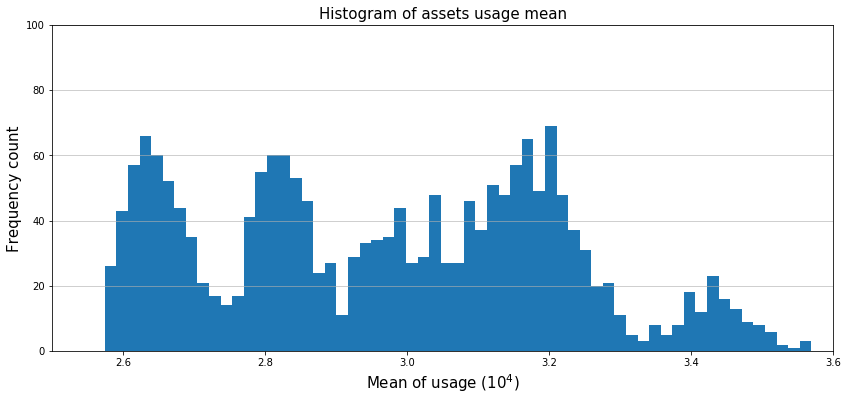

In [14]:
mean_usages = []
std_usages = []
for asset in tqdm(assets_un):
    asset_usages = usage.query("Asset == @asset").Use.to_list()
    if len(asset_usages) > 0:
        mean_usages.append(np.mean(asset_usages))
        std_usages.append(np.std(asset_usages))

mean_usages = list(map(lambda x: x / 1e4, mean_usages))

plt.figure(figsize=(14, 6))
plt.hist(mean_usages, bins=500)
plt.grid(axis="y", alpha=0.75)
plt.xlim(2.5, 3.6)
plt.ylim(0, 100)
plt.xlabel("Mean of usage $(10^4)$", fontsize=15)
plt.ylabel("Frequency count", fontsize=15)
plt.title("Histogram of assets usage mean", fontsize=15)
plt.show()

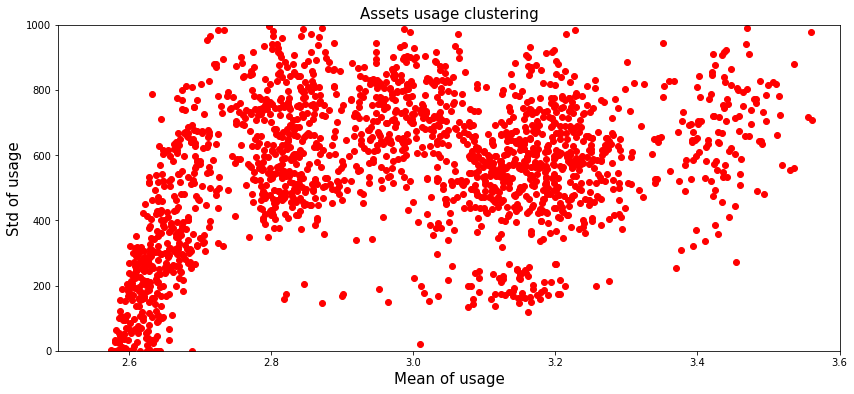

In [15]:
plt.figure(figsize=(14, 6))
plt.plot(mean_usages, std_usages, "ro")
plt.xlim(2.5, 3.6)
plt.ylim(0, 1000)
plt.xlabel("Mean of usage", fontsize=15)
plt.ylabel("Std of usage", fontsize=15)
plt.title("Assets usage clustering", fontsize=15)
plt.show()

100%|██████████| 1913/1913 [00:04<00:00, 455.43it/s]


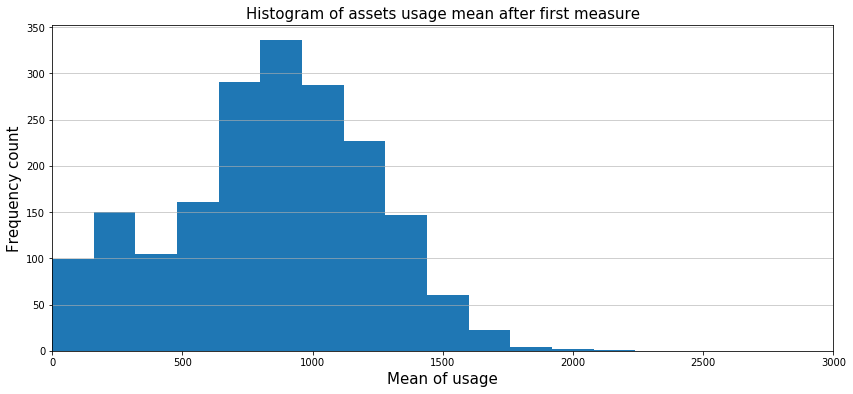

In [16]:
mean_usages = []
std_usages = []
for asset in tqdm(assets_un):
    asset_usages = usage.query("Asset == @asset").Use.to_list()
    if len(asset_usages) > 0:
        mean_usages.append(np.mean(asset_usages) - asset_usages[0])
        std_usages.append(np.std(asset_usages))

plt.figure(figsize=(14, 6))
plt.hist(mean_usages, bins=500)
plt.grid(axis="y", alpha=0.75)
plt.xlim(0, 3000)
plt.xlabel("Mean of usage", fontsize=15)
plt.ylabel("Frequency count", fontsize=15)
plt.title("Histogram of assets usage mean after first measure", fontsize=15)
plt.show()

In [17]:
parts = consumption.Part.unique()
print(parts)
print(len(parts))

['P361646' 'P991287' 'P169319' ... 'P364693' 'P136942' 'P835531']
3162


In [18]:
assets_cons, parts_cons = consumption.Asset, consumption.Part

assets_parts = []
for asset, part in zip(assets_cons, parts_cons):
    assets_parts.append(asset + "_" + part)
assets_parts = np.unique(assets_parts)

print(len(assets_parts))

140704


In [19]:
parts_usages = []
parts_usages_mean = []
parts_usages_std = []
parts_usages_count = []
assets = []
parts = []
for asset_part in tqdm(assets_parts):
    asset, part = asset_part.split("_")
    consumptions_times = consumption.query("Asset == @asset and Part == @part")

    if len(consumptions_times) > 0:
        try:
            usage_asset_mean_each_t = mean_usages[list(assets_un).index(asset)] / 730
            assets.append(asset)
            parts.append(part)

            usages_snapshots = []
            for cons_time in consumptions_times.Time:
                usages_snapshots.append(cons_time * usage_asset_mean_each_t)
                
            parts_usages.append(usages_snapshots)
            parts_usages_mean.append(np.mean(usages_snapshots))
            parts_usages_std.append(np.std(usages_snapshots))
            parts_usages_count.append(len(usages_snapshots))
        except IndexError:
            pass

100%|██████████| 140704/140704 [32:33<00:00, 72.03it/s]


In [20]:
data = {
    "asset": assets,
    "part": parts,
    "consumptions": parts_usages,
    "consumption_usage_mean": parts_usages_mean,
    "consumption_usage_std": parts_usages_std,
    "consumption_counts": parts_usages_count,
}

parts_usage_df = pd.DataFrame(data)
parts_usage_df.to_csv("../data/parts_usages.csv", index=False)
parts_usage_df.head(10)

asset     part                                       consumptions  \
0  A000204  P012500  [132.38097217866513, 132.38097217866513, 132.3...   
1  A000204  P013883            [129.38592755923833, 352.8162561684786]   
2  A000204  P014307                               [100.03449028885557]   
3  A000204  P014833                               [28.752428346497407]   
4  A000204  P024715             [243.7966320213426, 352.8162561684786]   
5  A000204  P026652                               [27.554410498726682]   
6  A000204  P031042            [129.38592755923833, 352.8162561684786]   
7  A000204  P047997            [129.38592755923833, 352.8162561684786]   
8  A000204  P051019                                [80.26719580063859]   
9  A000204  P056180                                [80.26719580063859]   

   consumption_usage_mean  consumption_usage_std  consumption_counts  
0              284.871530             136.397467                   7  
1              241.101092             111.715164                   2  
2              100.034490               0.000000                   1  
3               28.752428               0.000000                   1  
4              298.306444              54.509812                   2  
5               27.554410               0.000000                   1  
6              241.101092             111.715164                   2  
7              241.101092             111.715164                   2  
8               80.267196               0.000000                   1  
9               80.267196               0.000000                   1

In [21]:
parts_un = parts_usage_df.part.unique()

for part in parts_un:
    print(parts_usage_df.query("part == @part"))

          asset     part                                       consumptions  \
0       A000204  P012500  [132.38097217866513, 132.38097217866513, 132.3...   
126     A000463  P012500            [160.58202527777942, 929.8819603294669]   
481     A002941  P012500                               [1064.2091460652373]   
845     A006032  P012500  [283.7753568887972, 658.6520276127434, 737.187...   
1105    A007567  P012500                                [250.0174321201232]   
...         ...      ...                                                ...   
138922  A992101  P012500                                [150.4744166908987]   
139191  A994158  P012500             [648.6848845340089, 847.5741179996248]   
139499  A996001  P012500                                 [340.905001186304]   
139707  A996817  P012500                                [618.3253649128009]   
139993  A998987  P012500             [978.5924937205976, 980.2768181504093]   

        consumption_usage_mean  consumption_usage_s

          asset     part                                       consumptions  \
17      A000204  P122093  [27.554410498726682, 129.38592755923833, 227.6...   
428     A002551  P122093  [45.63578712660765, 215.27184432450275, 299.16...   
780     A003825  P122093  [101.97593200040568, 188.26325907767202, 593.9...   
862     A006032  P122093  [115.18556921685496, 285.8696399654673, 286.91...   
1120    A007567  P122093  [159.00231428692044, 360.77076827859884, 560.3...   
...         ...      ...                                                ...   
139423  A995151  P122093  [234.09333692195912, 236.79961827365807, 493.8...   
139728  A996817  P122093  [114.21996083646766, 291.0412463621532, 316.30...   
139814  A997141  P122093  [164.39003069300193, 339.0544383043165, 509.04...   
139923  A998861  P122093  [462.1704393726353, 528.4201269277571, 753.984...   
140391  A999952  P122093  [242.94842739167598, 501.25566341156133, 758.1...   

        consumption_usage_mean  consumption_usage_s

          asset     part                            consumptions  \
34      A000204  P261053                    [100.03449028885557]   
11775   A092462  P261053                     [484.8044703358006]   
38119   A288494  P261053                     [1181.591536518728]   
54687   A399520  P261053                    [120.19562856494927]   
60891   A430000  P261053                     [556.7066039345201]   
76419   A541783  P261053                     [639.5923197015649]   
80744   A567553  P261053  [32.99095354269694, 346.7284529193247]   
97712   A682371  P261053                     [733.2302872848944]   
104115  A737807  P261053                     [65.97551232790869]   
128069  A921347  P261053                     [798.0848297111304]   

        consumption_usage_mean  consumption_usage_std  consumption_counts  
34                  100.034490                0.00000                   1  
11775               484.804470                0.00000                   1  
38119              1181

          asset     part                                       consumptions  \
52      A000204  P460265                               [100.03449028885557]   
3333    A029338  P460265                                [969.0263782646296]   
4711    A039156  P460265                               [292.68591854910636]   
34555   A263166  P460265                               [124.06468998618992]   
37198   A283388  P460265                                [387.3312602726525]   
38334   A288849  P460265                                [294.1568767390316]   
39491   A296536  P460265                               [121.03885061274295]   
55586   A402608  P460265                               [424.74973189855734]   
56543   A407826  P460265                                [896.8374124466671]   
69294   A487213  P460265                               [128.12695967918003]   
70844   A502861  P460265                               [104.92637984757285]   
71498   A510287  P460265                            

          asset     part          consumptions  consumption_usage_mean  \
69      A000204  P615464   [352.8162561684786]              352.816256   
468     A002551  P615464  [215.27184432450275]              215.271844   
818     A003825  P615464  [394.45635235321754]              394.456352   
900     A006032  P615464   [497.3922307091464]              497.392231   
1151    A007567  P615464  [360.77076827859884]              360.770768   
...         ...      ...                   ...                     ...   
139472  A995151  P615464   [740.1679496896626]              740.167950   
139774  A996817  P615464   [519.4811680350884]              519.481168   
139855  A997141  P615464   [339.0544383043165]              339.054438   
139966  A998861  P615464   [753.9845393178146]              753.984539   
140427  A999952  P615464   [758.1666441016094]              758.166644   

        consumption_usage_std  consumption_counts  
69                        0.0                   1  
468    

          asset     part                              consumptions  \
85      A000204  P808631                       [230.6184356958646]   
196     A000463  P808631                       [616.1868411821769]   
553     A002941  P808631  [140.94436607114005, 140.94436607114005]   
1479    A010045  P808631                       [625.7014409766856]   
1575    A010961  P808631                       [494.7422493557579]   
...         ...      ...                                       ...   
135545  A970445  P808631                       [99.19752977443417]   
137610  A985742  P808631                       [339.9998632313908]   
138814  A991622  P808631                       [453.2004597573556]   
139105  A992704  P808631                       [577.4055846130201]   
139254  A994158  P808631                       [985.2666642450513]   

        consumption_usage_mean  consumption_usage_std  consumption_counts  
85                  230.618436                    0.0                   1  
196    

          asset     part                                       consumptions  \
116     A000270  P577372                               [106.26168514511909]   
815     A003825  P577372                                [802.3600803548403]   
1300    A009882  P577372                                [580.1953475253385]   
2888    A026097  P577372                                [700.6682730007286]   
4402    A035777  P577372           [241.39330230554452, 242.32893526021718]   
...         ...      ...                                                ...   
137433  A984872  P577372  [1132.3035879309505, 1132.3035879309505, 1132....   
137685  A986441  P577372                               [407.79397036346415]   
138059  A987757  P577372                               [1166.5601705594229]   
139306  A994440  P577372           [1179.8240133373754, 1179.8240133373754]   
139675  A996549  P577372             [861.6273398237792, 861.6273398237792]   

        consumption_usage_mean  consumption_usage_s

          asset     part                             consumptions  \
145     A000463  P166748  [451.87035020026303, 1049.384862861768]   
1348    A010028  P166748                     [233.36346422943836]   
5527    A046920  P166748                      [98.99432303290583]   
6611    A058485  P166748                      [281.2350394774786]   
6867    A060560  P166748                      [689.0283246883524]   
...         ...      ...                                      ...   
135566  A971120  P166748                       [369.319626468601]   
136331  A979167  P166748                     [457.04158347626134]   
137355  A984867  P166748                      [598.0600547231076]   
137469  A985188  P166748                      [884.7817816558075]   
138656  A991069  P166748                     [477.50933099575406]   

        consumption_usage_mean  consumption_usage_std  consumption_counts  
145                 750.627607             298.757256                   2  
1348               

          asset     part                            consumptions  \
173     A000463  P468683                     [1344.407653488386]   
266     A000495  P468683                     [742.7968944430148]   
608     A003120  P468683                    [451.36836173761225]   
1141    A007567  P468683                     [591.0499820734491]   
1459    A010045  P468683                     [451.7456524292881]   
...         ...      ...                                     ...   
139540  A996001  P468683  [91.33280405614374, 538.4387401914521]   
139658  A996549  P468683                    [1370.2268112475376]   
139759  A996817  P468683                     [573.2963418907319]   
140131  A998987  P468683                     [914.5881653877531]   
140414  A999952  P468683                     [759.5628994314467]   

        consumption_usage_mean  consumption_usage_std  consumption_counts  
173                1344.407653               0.000000                   1  
266                 742.796894 

          asset     part          consumptions  consumption_usage_mean  \
208     A000463  P979959  [169.91818953811543]              169.918190   
1662    A011180  P979959  [146.33187502824498]              146.331875   
1786    A011599  P979959  [286.44423557041017]              286.444236   
2742    A025347  P979959  [187.07157889133643]              187.071579   
5092    A043450  P979959   [513.9782332661584]              513.978233   
...         ...      ...                   ...                     ...   
135878  A975216  P979959   [705.1005330765762]              705.100533   
136303  A978891  P979959  [217.93413446809356]              217.934134   
138491  A990605  P979959   [817.7763751883634]              817.776375   
138832  A991622  P979959   [452.4217648093189]              452.421765   
139610  A996445  P979959  [182.65537650031158]              182.655377   

        consumption_usage_std  consumption_counts  
208                       0.0                   1  
1662   

          asset     part                              consumptions  \
247     A000495  P224501  [13.383727827802069, 14.499038480118907]   
2273    A018997  P224501                      [150.60080196732267]   
3483    A030172  P224501                       [643.1930211281795]   
3576    A030233  P224501                        [38.8961124086902]   
3645    A030334  P224501                       [434.7900029141575]   
...         ...      ...                                       ...   
138218  A989377  P224501                      [289.70135581267124]   
138433  A990605  P224501                       [1329.353377018527]   
138665  A991069  P224501                       [61.92699136351185]   
139440  A995151  P224501                       [987.7926933701165]   
140063  A998987  P224501                       [966.8022227119158]   

        consumption_usage_mean  consumption_usage_std  consumption_counts  
247                  13.941383               0.557655                   2  
2273   

          asset     part          consumptions  consumption_usage_mean  \
279     A000495  P574224   [704.8763322642423]              704.876332   
4306    A035286  P574224   [768.1554551309373]              768.155455   
6562    A057233  P574224   [343.7979612608109]              343.797961   
9301    A077065  P574224   [350.9625615682086]              350.962562   
14254   A107046  P574224  [318.90016107011184]              318.900161   
...         ...      ...                   ...                     ...   
132680  A947454  P574224  [1682.2896137725602]             1682.289614   
138539  A990953  P574224  [20.807655870735626]               20.807656   
139096  A992704  P574224  [463.91062940652967]              463.910629   
139771  A996817  P574224   [291.0412463621532]              291.041246   
140168  A998987  P574224   [980.2768181504093]              980.276818   

        consumption_usage_std  consumption_counts  
279                       0.0                   1  
4306   

          asset     part                                       consumptions  \
309     A000495  P946191                               [10.037795870851552]   
1244    A009533  P946191                                [182.0357644671465]   
1781    A011599  P946191  [242.06555118626213, 837.8157688280072, 837.81...   
1896    A013102  P946191           [356.06809026820423, 356.06809026820423]   
2033    A014612  P946191  [869.7681515837239, 869.7681515837239, 869.768...   
...         ...      ...                                                ...   
137219  A983118  P946191                                [32.34833751140184]   
137339  A983465  P946191             [820.8394009180047, 822.3999320984572]   
138106  A987757  P946191                               [1255.1358216358249]   
138826  A991622  P946191                               [39.713442349871364]   
139051  A992233  P946191                               [45.636746340234836]   

        consumption_usage_mean  consumption_usage_s

          asset     part                            consumptions  \
393     A001215  P871718                    [24.271701710515007]   
560     A002941  P871718                    [1024.6180320003102]   
7588    A063997  P871718                     [701.0726905443266]   
11830   A092462  P871718                     [512.5797264487892]   
12219   A095311  P871718                     [732.4228292505721]   
12375   A095743  P871718                     [90.15380490228871]   
12556   A097170  P871718                     [825.0576059308831]   
14345   A107779  P871718                    [1139.3670673645665]   
14492   A108190  P871718                     [218.6228698329589]   
17561   A132633  P871718                     [938.3866971150748]   
17887   A135851  P871718  [226.8562200142895, 621.3887765608799]   
18317   A138687  P871718                     [542.2206226071014]   
20755   A161986  P871718                     [484.3832670728599]   
23741   A181995  P871718                    [220

          asset     part                             consumptions  \
439     A002551  P188984                     [46.557722220074474]   
680     A003641  P188984   [36.54216528525579, 624.3943894393707]   
939     A006104  P188984                     [166.76056729306995]   
1127    A007567  P188984                     [160.09888197165785]   
1803    A012120  P188984                      [580.4498619476858]   
...         ...      ...                                      ...   
135377  A968343  P188984  [200.96659953551597, 628.0206235484874]   
135648  A972258  P188984   [88.34117663524775, 152.5893050972461]   
137144  A983118  P188984  [333.18787636743895, 574.1829908273827]   
138659  A991069  P188984                       [199.957032354472]   
139825  A997141  P188984                     [247.51908030480405]   

        consumption_usage_mean  consumption_usage_std  consumption_counts  
439                  46.557722               0.000000                   1  
680                

          asset     part                                       consumptions  \
507     A002941  P199956                               [1023.0343874377131]   
2086    A015811  P199956                                [798.7912485586154]   
2952    A027486  P199956                               [171.22978336557642]   
3826    A031178  P199956                                [312.3086582121109]   
4816    A040716  P199956                                [56.58760866609483]   
...         ...      ...                                                ...   
131908  A943615  P199956                               [164.53545432976213]   
133921  A959904  P199956                               [128.09968204177943]   
134626  A963278  P199956                                [881.3507893043881]   
136337  A979167  P199956  [183.7469979370211, 184.9099536201668, 540.774...   
136644  A980546  P199956                                [535.6125586740906]   

        consumption_usage_mean  consumption_usage_s

          asset     part          consumptions  consumption_usage_mean  \
561     A002941  P914514   [424.4167427760172]              424.416743   
21089   A164490  P914514    [338.521062240332]              338.521062   
29774   A231293  P914514  [100.02185065101418]              100.021851   
88463   A621532  P914514   [832.7885180181689]              832.788518   
94521   A660658  P914514   [282.1014564491425]              282.101456   
140275  A998987  P914514   [995.4357380187147]              995.435738   

        consumption_usage_std  consumption_counts  
561                       0.0                   1  
21089                     0.0                   1  
29774                     0.0                   1  
88463                     0.0                   1  
94521                     0.0                   1  
140275                    0.0                   1  
          asset     part                            consumptions  \
563     A002941  P922218                     [435

          asset     part                              consumptions  \
615     A003120  P537311                       [506.6743665355015]   
721     A003641  P537311                       [498.8799956334921]   
2760    A025426  P537311                       [36.60359184995124]   
2969    A027486  P537311                       [118.2224395469646]   
3141    A028051  P537311                       [564.7068230178489]   
...         ...      ...                                       ...   
137589  A985742  P537311                       [435.1244787061013]   
137648  A986270  P537311                      [306.86367875109784]   
138889  A991647  P537311                      [387.10240788911744]   
139670  A996549  P537311  [398.90154621471254, 398.90154621471254]   
140340  A999836  P537311    [864.1349982950816, 874.0188953344044]   

        consumption_usage_mean  consumption_usage_std  consumption_counts  
615                 506.674367               0.000000                   1  
721    

          asset     part                              consumptions  \
650     A003146  P625295                       [542.9223444682999]   
2048    A015223  P625295                      [216.06366790343628]   
2208    A018230  P625295                       [1069.491055879746]   
2294    A018997  P625295                      [201.26246880559484]   
2761    A025426  P625295                       [48.82781026021798]   
...         ...      ...                                       ...   
136848  A982085  P625295                       [95.67816166959534]   
136957  A982449  P625295                      [116.12080249918654]   
137825  A986772  P625295                       [486.8803684847017]   
137984  A987421  P625295  [185.74838747218033, 185.74838747218033]   
139037  A992233  P625295                       [50.33361577924518]   

        consumption_usage_mean  consumption_usage_std  consumption_counts  
650                 542.922344                    0.0                   1  
2048   

          asset     part                                       consumptions  \
710     A003641  P454382                                [498.8799956334921]   
5686    A046944  P454382                               [1115.5850540250449]   
15155   A116088  P454382                                [99.61486763486604]   
17701   A134154  P454382                               [1272.9569116504122]   
22847   A178486  P454382                                 [78.7738200914837]   
23153   A180059  P454382            [265.6785129412498, 510.51949545573484]   
28285   A220133  P454382            [207.53188904488914, 1273.331251427964]   
30841   A241361  P454382             [232.0872699859697, 232.0872699859697]   
35622   A274757  P454382                                [1215.609214351182]   
40202   A302502  P454382                               [265.81647983401075]   
46162   A340894  P454382                                [667.9661148672337]   
49141   A359505  P454382                            

          asset     part          consumptions  consumption_usage_mean  \
743     A003641  P742780   [482.9920976833809]              482.992098   
3868    A031178  P742780  [345.39220251424126]              345.392203   
4018    A032543  P742780  [154.09869624814394]              154.098696   
11182   A087766  P742780  [241.27824369107532]              241.278244   
12652   A097181  P742780   [994.5787633858381]              994.578763   
...         ...      ...                   ...                     ...   
137098  A983035  P742780  [229.11776596645342]              229.117766   
137443  A984872  P742780  [1144.4788953280574]             1144.478895   
137778  A986527  P742780   [324.6914133183836]              324.691413   
138358  A989821  P742780  [476.46538683616507]              476.465387   
139561  A996001  P742780  [508.70247840573086]              508.702478   

        consumption_usage_std  consumption_counts  
743                       0.0                   1  
3868   

          asset     part          consumptions  consumption_usage_mean  \
804     A003825  P413650  [101.97593200040568]              101.975932   
1627    A011180  P413650  [260.04760923694135]              260.047609   
3124    A028051  P413650  [390.83656435182706]              390.836564   
4547    A036314  P413650  [370.90952304856296]              370.909523   
4772    A040179  P413650   [663.0913881612447]              663.091388   
...         ...      ...                   ...                     ...   
133693  A958605  P413650  [433.00035342783303]              433.000353   
134476  A962735  P413650   [306.1722844549612]              306.172284   
136089  A976947  P413650  [185.68377377674906]              185.683774   
136268  A978891  P413650   [83.78826917414082]               83.788269   
139835  A997141  P413650   [680.9109794045364]              680.910979   

        consumption_usage_std  consumption_counts  
804                       0.0                   1  
1627   

          asset     part                                       consumptions  \
872     A006032  P191352                                [118.3269938318601]   
4699    A039156  P191352                               [223.81864359637547]   
5831    A047821  P191352                               [175.84750435828613]   
8162    A068651  P191352                                [130.5847708172828]   
20669   A161986  P191352             [417.2060256539961, 417.2060256539961]   
23039   A180054  P191352                               [290.17810782167146]   
30291   A234852  P191352                                [9.575483214737014]   
31378   A244978  P191352                               [245.97354735490418]   
31552   A245979  P191352                                [634.5832889220026]   
35816   A275002  P191352                               [319.22949108064245]   
40397   A303019  P191352                               [15.603408102049627]   
41666   A312846  P191352                            

          asset     part          consumptions  consumption_usage_mean  \
955     A006104  P371905   [755.2023143017371]              755.202314   
2798    A025521  P371905  [1301.6263080676715]             1301.626308   
3916    A031394  P371905   [1320.581048699206]             1320.581049   
6747    A059981  P371905  [1175.5019066624768]             1175.501907   
10028   A082360  P371905  [302.58995740920585]              302.589957   
20215   A156953  P371905   [831.0962997674244]              831.096300   
31312   A244845  P371905   [1285.415797676792]             1285.415798   
33100   A254454  P371905   [717.2595621328126]              717.259562   
37006   A281591  P371905   [950.0019214540889]              950.001921   
41331   A310481  P371905   [755.4613730327776]              755.461373   
42217   A316791  P371905  [1225.3602320915659]             1225.360232   
44743   A333832  P371905   [825.7562566963591]              825.756257   
48338   A355019  P371905  [1366.165397

          asset     part                                       consumptions  \
1085    A006787  P508427                                 [766.510703521914]   
2123    A015811  P508427                                [343.9240097960705]   
3016    A027505  P508427                                [678.1264621917222]   
3247    A028544  P508427            [173.52174438303368, 657.9366141190027]   
4552    A036314  P508427                                [1199.608277247154]   
5136    A045022  P508427                               [102.08208941547664]   
6256    A055485  P508427                               [450.00006126775435]   
8649    A072112  P508427                                [970.5483305463015]   
10680   A085068  P508427            [365.74476895281606, 461.9933923614519]   
16504   A125118  P508427                                [908.8381214615599]   
17295   A130356  P508427                                [585.9116612093205]   
22652   A175822  P508427                            

          asset     part          consumptions  consumption_usage_mean  \
1224    A009533  P623291  [194.89022619489486]              194.890226   
1385    A010028  P623291  [233.36346422943836]              233.363464   
2593    A024929  P623291   [937.2985392025462]              937.298539   
2971    A027486  P623291  [171.55103999478013]              171.551040   
4310    A035286  P623291  [409.27566993059884]              409.275670   
...         ...      ...                   ...                     ...   
135312  A968300  P623291   [60.96302163972924]               60.963022   
135439  A968343  P623291   [669.4699847026876]              669.469985   
136108  A976947  P623291  [331.57816745848044]              331.578167   
136790  A981683  P623291   [867.2220389234327]              867.222039   
138252  A989377  P623291  [1118.5691238322584]             1118.569124   

        consumption_usage_std  consumption_counts  
1224                      0.0                   1  
1385   

          asset     part          consumptions  consumption_usage_mean  \
1367    A010028  P417013  [17.590210871565706]               17.590211   
3127    A028051  P417013   [188.7309645349127]              188.730965   
3498    A030172  P417013   [162.8757521203142]              162.875752   
3586    A030233  P417013   [538.5615564280181]              538.561556   
4995    A041506  P417013  [156.88862489760137]              156.888625   
...         ...      ...                   ...                     ...   
128453  A923493  P417013   [630.6643261783038]              630.664326   
130656  A936583  P417013   [181.6542772158726]              181.654277   
137934  A987249  P417013   [48.63167391275644]               48.631674   
138677  A991069  P417013   [337.9870733454322]              337.987073   
138951  A992101  P417013  [260.79730573609623]              260.797306   

        consumption_usage_std  consumption_counts  
1367                      0.0                   1  
3127   

          asset     part                            consumptions  \
1529    A010961  P282100                     [409.0692545375221]   
9516    A078261  P282100                    [105.53921077331512]   
10546   A085059  P282100                     [813.7112607686938]   
16091   A122955  P282100                     [75.73591061328293]   
17380   A130776  P282100                     [668.0554185778473]   
17507   A132633  P282100                      [528.629167674364]   
18244   A138687  P282100                     [544.0586586159391]   
20820   A162255  P282100                      [153.786412580235]   
23989   A185492  P282100                    [508.90194781901596]   
25387   A199583  P282100                     [68.25327165478097]   
29814   A231536  P282100                     [932.6713826119465]   
34785   A265011  P282100                    [191.86528386382125]   
36364   A277974  P282100                     [456.7167199339319]   
36692   A278827  P282100                     [65

          asset     part          consumptions  consumption_usage_mean  \
1633    A011180  P500172  [425.77286529302603]              425.772865   
12870   A097940  P500172   [561.3652247303166]              561.365225   
37207   A283388  P500172   [741.2718946597316]              741.271895   
52966   A385577  P500172   [4.511301570210877]                4.511302   
70621   A501352  P500172   [777.1742328360808]              777.174233   
71812   A513853  P500172                 [0.0]                0.000000   
88513   A621592  P500172   [664.4684148105858]              664.468415   
98452   A687649  P500172  [1106.2879108282968]             1106.287911   
125161  A896498  P500172  [224.31690178382857]              224.316902   
130222  A933901  P500172   [664.0200268499166]              664.020027   
135890  A975385  P500172   [203.0367475597387]              203.036748   

        consumption_usage_std  consumption_counts  
1633                      0.0                   1  
12870  

          asset     part          consumptions  consumption_usage_mean  \
1747    A011599  P644749  [6.7240430885072815]                6.724043   
8118    A067561  P644749  [1481.6347499476074]             1481.634750   
59445   A423193  P644749   [617.3422097838857]              617.342210   
114478  A820426  P644749  [378.21813134656867]              378.218131   

        consumption_usage_std  consumption_counts  
1747                      0.0                   1  
8118                      0.0                   1  
59445                     0.0                   1  
114478                    0.0                   1  
          asset     part                             consumptions  \
1748    A011599  P647686                      [640.1289020258931]   
3600    A030233  P647686                      [301.1955371134472]   
6037    A049130  P647686                       [828.609851643583]   
8229    A068651  P647686                      [90.40484133504194]   
8989    A073164  P647686

          asset     part          consumptions  consumption_usage_mean  \
1817    A012120  P374736  [1053.3544449050644]             1053.354445   
2869    A026097  P374736  [1027.4047733637626]             1027.404773   
4544    A036314  P374736     [663.29315608234]              663.293156   
5280    A046288  P374736  [463.99817906064095]              463.998179   
5998    A049130  P374736   [827.1432855344793]              827.143286   
...         ...      ...                   ...                     ...   
128624  A926119  P374736  [430.16014853524075]              430.160149   
129342  A929756  P374736   [866.4190971865958]              866.419097   
132760  A948155  P374736   [654.8472611006671]              654.847261   
133593  A957539  P374736   [271.5882547167752]              271.588255   
137420  A984872  P374736   [591.3720735737683]              591.372074   

        consumption_usage_std  consumption_counts  
1817                      0.0                   1  
2869   

          asset     part          consumptions  consumption_usage_mean  \
1982    A014612  P121169   [876.4202980585517]              876.420298   
38306   A288849  P121169  [294.65714353620683]              294.657144   
43625   A322616  P121169   [228.3836768741373]              228.383677   
46742   A345295  P121169  [1028.7678680004183]             1028.767868   
117650  A843715  P121169    [600.464873134417]              600.464873   

        consumption_usage_std  consumption_counts  
1982                      0.0                   1  
38306                     0.0                   1  
43625                     0.0                   1  
46742                     0.0                   1  
117650                    0.0                   1  
          asset     part                             consumptions  \
1984    A014612  P128650                      [873.0942248211378]   
2070    A015811  P128650                      [826.5270558002339]   
9355    A077804  P128650   [446.1521

          asset     part                            consumptions  \
2118    A015811  P468880                    [307.86746038196634]   
16401   A124878  P468880                     [267.5081929433204]   
43659   A322616  P468880                     [303.0642708329807]   
54583   A399220  P468880                     [602.9964548502401]   
66368   A467654  P468880                     [518.4185130610502]   
73151   A520535  P468880                    [167.80722922459253]   
76073   A537042  P468880                    [255.83474300515263]   
85384   A603109  P468880                    [470.98730007255386]   
103983  A735718  P468880                      [595.359915394911]   
118469  A849432  P468880                     [377.7874843971149]   
137173  A983118  P468880                     [574.9916992651677]   
140132  A998987  P468880  [923.0097875368116, 924.6941119666233]   

        consumption_usage_mean  consumption_usage_std  consumption_counts  
2118                307.867460         

          asset     part                             consumptions  \
2213    A018230  P671400                     [1083.0289173465783]   
5379    A046671  P671400                     [1107.2330744311428]   
7521    A063140  P671400                      [451.5290300194451]   
12885   A097940  P671400                      [627.6188557192216]   
26380   A207920  P671400                      [471.7461757131893]   
34379   A261774  P671400                      [499.5807134826367]   
35881   A275002  P671400                      [639.8002825439767]   
36401   A277974  P671400                      [771.3837513844755]   
40986   A306132  P671400                      [592.8187586716664]   
46531   A344353  P671400                      [405.9173564575198]   
53902   A393720  P671400                      [965.7411136769671]   
55521   A402347  P671400                     [259.56320635737274]   
62986   A445246  P671400                      [953.9924914961074]   
73370   A521002  P671400          

          asset     part          consumptions  consumption_usage_mean  \
2351    A020732  P578495  [172.00675781933703]              172.006758   
8216    A068651  P578495   [615.6139195671904]              615.613920   
9627    A078300  P578495   [581.5643680398111]              581.564368   
13862   A103868  P578495  [431.93845065763315]              431.938451   
14679   A109245  P578495  [126.51702238602716]              126.517022   
37802   A286874  P578495  [107.94606426693777]              107.946064   
51533   A377725  P578495  [14.444096983484926]               14.444097   
54078   A394518  P578495   [97.62453743137502]               97.624537   
58069   A415390  P578495  [1012.0852494125209]             1012.085249   
70503   A500920  P578495  [194.26473897829553]              194.264739   
73656   A521377  P578495  [107.03672975242584]              107.036730   
89235   A627951  P578495   [664.2234600724389]              664.223460   
90401   A637738  P578495    [152.38493

          asset     part          consumptions  consumption_usage_mean  \
2499    A024432  P507611  [166.86000577197495]              166.860006   
26469   A208714  P507611   [756.7592169781907]              756.759217   
34256   A261160  P507611  [1362.2232298413292]             1362.223230   
38565   A290558  P507611    [93.5887146282733]               93.588715   
57249   A411498  P507611  [1175.3178290005524]             1175.317829   
73350   A521002  P507611  [224.84117197959492]              224.841172   
77289   A546573  P507611  [220.52676454829486]              220.526765   
92467   A649859  P507611   [47.52537485756633]               47.525375   
97281   A678675  P507611    [596.047533493902]              596.047533   
103827  A733174  P507611   [447.4559456630542]              447.455946   
104554  A744243  P507611   [982.2816037481975]              982.281604   
114130  A817955  P507611   [42.88883911402041]               42.888839   
117444  A842104  P507611   [1212.51389

         asset     part          consumptions  consumption_usage_mean  \
2631   A025347  P065418  [206.51629497681583]              206.516295   
12945  A098552  P065418   [264.0535251295828]              264.053525   

       consumption_usage_std  consumption_counts  
2631                     0.0                   1  
12945                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
2662    A025347  P249225  [297.70530834320203]              297.705308   
12962   A098552  P249225  [340.97346505863516]              340.973465   
19797   A152340  P249225  [100.30291308913375]              100.302913   
34859   A266990  P249225  [1136.8915155708992]             1136.891516   
41825   A314100  P249225   [19.78458031704657]               19.784580   
54555   A399220  P249225  [108.80514543440971]              108.805145   
55498   A402347  P249225  [244.78252377313345]              244.782524   
67919   A476410  P249225   [986.721

          asset     part                              consumptions  \
2780    A025521  P140344  [1297.9955512808717, 1297.9955512808717]   
8066    A067561  P140344                      [1314.4283204864353]   
13327   A100046  P140344                      [380.38309765257776]   
25896   A203444  P140344                      [421.18805135772277]   
32685   A252155  P140344                        [451.699518821715]   
37142   A283388  P140344                        [566.527619191897]   
39260   A295488  P140344                       [1524.002867238898]   
48080   A353762  P140344                       [401.5707138369377]   
49390   A360661  P140344                       [1200.595734382281]   
76196   A538561  P140344                       [378.3738037241151]   
81754   A573376  P140344                      [1204.0539278770427]   
89201   A627951  P140344                       [510.3775851291902]   
120200  A861661  P140344                       [681.0672912578385]   
121270  A868807  P14

          asset     part          consumptions  consumption_usage_mean  \
2907    A026097  P774666  [363.04055595892675]              363.040556   
3034    A027505  P774666   [371.0777851049124]              371.077785   
3950    A031394  P774666   [276.7462394601711]              276.746239   
6276    A055485  P774666   [369.3642121388504]              369.364212   
8125    A067561  P774666   [954.4700348408568]              954.470035   
...         ...      ...                   ...                     ...   
136506  A979872  P774666   [536.0489183490705]              536.048918   
138264  A989377  P774666   [534.3380562767047]              534.338056   
138622  A991068  P774666   [1038.964442035986]             1038.964442   
139387  A994967  P774666  [407.80635142208257]              407.806351   
139690  A996549  P774666   [478.6818554576551]              478.681855   

        consumption_usage_std  consumption_counts  
2907                      0.0                   1  
3034   

          asset     part                            consumptions  \
3129    A028051  P442645                     [891.6423521334457]   
7981    A067512  P442645                    [1263.2087511584002]   
11454   A089124  P442645                     [836.8309140039127]   
12511   A097170  P442645                     [806.1451106659919]   
15610   A120119  P442645                      [705.706678201389]   
16107   A122955  P442645                     [106.0302748585961]   
16598   A125623  P442645  [263.0811223193692, 264.8006067789729]   
21552   A168058  P442645                     [606.7578439367456]   
23309   A180615  P442645                     [286.7114498376479]   
25692   A200763  P442645                     [646.6296587233485]   
28536   A221326  P442645                    [362.57528890668425]   
32726   A252155  P442645                     [50.72561441313377]   
33830   A258808  P442645                     [378.8459880492003]   
35849   A275002  P442645                     [33

          asset     part          consumptions  consumption_usage_mean  \
3264    A028544  P646846   [621.7862507058707]              621.786251   
26258   A207303  P646846   [947.6564309875039]              947.656431   
31593   A245979  P646846   [766.2005636613808]              766.200564   
31867   A248859  P646846  [134.70439407071174]              134.704394   
32237   A250298  P646846    [714.177378561538]              714.177379   
37659   A284820  P646846   [830.7395344709563]              830.739534   
39843   A298902  P646846   [688.8522690213168]              688.852269   
41549   A312402  P646846  [1008.0664792960501]             1008.066479   
41859   A314100  P646846   [608.7563174475866]              608.756317   
53899   A393720  P646846   [762.8660020268417]              762.866002   
57983   A415226  P646846   [9.360925778669685]                9.360926   
67372   A473072  P646846   [35.20859003791873]               35.208590   
67969   A476410  P646846  [1476.884852

          asset     part         consumptions  consumption_usage_mean  \
3451    A029424  P926392  [239.9026243847035]              239.902624   
20326   A158516  P926392  [38.40691346100959]               38.406913   
45987   A339882  P926392  [776.9589129298629]              776.958913   
108354  A770389  P926392  [406.4462728442814]              406.446273   

        consumption_usage_std  consumption_counts  
3451                      0.0                   1  
20326                     0.0                   1  
45987                     0.0                   1  
108354                    0.0                   1  
          asset     part                              consumptions  \
3463    A030172  P046527                       [1043.734411546503]   
3555    A030233  P046527                        [660.236574732126]   
12692   A097735  P046527                       [574.1985970807721]   
13315   A100046  P046527                      [1052.7615192293335]   
17241   A130356  P046527

         asset     part          consumptions  consumption_usage_mean  \
3756   A030353  P858546  [1347.9047864885513]             1347.904786   
37967  A288080  P858546   [607.6898071726366]              607.689807   
45502  A337108  P858546  [1209.2134694393762]             1209.213469   
73582  A521304  P858546   [966.9760591456758]              966.976059   

       consumption_usage_std  consumption_counts  
3756                     0.0                   1  
37967                    0.0                   1  
45502                    0.0                   1  
73582                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
3761    A030353  P944789   [75.74681076808862]               75.746811   
7844    A065709  P944789   [61.05463225032141]               61.054632   
9328    A077065  P944789   [74.57954433324434]               74.579544   
14349   A107779  P944789  [145.10806990020424]              145.108070   
40453   A

          asset     part                             consumptions  \
3989    A032543  P283881  [319.8715361514503, 399.25571300655474]   
4902    A040943  P283881                      [66.99932753495929]   
6982    A060723  P283881                     [1057.5815794394855]   
7091    A060921  P283881                      [659.3750712148614]   
7963    A067512  P283881                     [1055.2651567369405]   
11246   A088647  P283881                      [215.8623057103266]   
13149   A098790  P283881                      [198.1962068136188]   
14579   A109202  P283881                      [546.0047774455023]   
14886   A113054  P283881                      [742.4304721140259]   
17271   A130356  P283881                      [819.4472054177526]   
22088   A172636  P283881                      [240.8290264454565]   
24438   A191516  P283881                     [197.33811937692624]   
24818   A195806  P283881                      [654.5794996629564]   
26223   A207303  P283881          

          asset     part                              consumptions  \
4126    A032565  P995317                       [390.8056369287945]   
15701   A120371  P995317                       [386.0847621696917]   
33876   A258808  P995317  [1050.9920958784267, 1050.9920958784267]   
34753   A264534  P995317                      [6.4863090973570685]   
59788   A423331  P995317                      [300.46023838343655]   
73015   A519501  P995317                       [673.0969854289749]   
76284   A538561  P995317                       [136.1663688561306]   
79040   A555548  P995317                                     [0.0]   
103261  A726282  P995317                      [285.99553675347636]   
103741  A732566  P995317                       [758.5575902650019]   
126155  A904238  P995317                       [56.28545637488054]   

        consumption_usage_mean  consumption_usage_std  consumption_counts  
4126                390.805637                    0.0                   1  
15701  

          asset     part                              consumptions  \
4321    A035286  P761877                       [803.2798596399066]   
12083   A095208  P761877                      [170.90264156112477]   
12801   A097735  P761877                       [263.2092839173174]   
21505   A167193  P761877                      [14.159192091067224]   
25001   A196573  P761877                      [416.50688650303425]   
26912   A210755  P761877                       [58.18645175773132]   
28712   A222597  P761877                      [491.78918780052743]   
42242   A316791  P761877                       [518.5532825750621]   
48580   A355669  P761877                       [346.2244102583833]   
51044   A371634  P761877                       [956.3172240783352]   
53703   A391166  P761877                       [441.0822230332078]   
64797   A458157  P761877                        [931.300006885453]   
70730   A501708  P761877                       [930.8461880235802]   
71211   A506342  P76

          asset     part                              consumptions  \
4574    A036314  P898720                       [852.0894448412932]   
11887   A093482  P898720                      [122.27287893860701]   
50101   A366762  P898720                      [127.65134959115728]   
56368   A407057  P898720                       [470.8962191864132]   
61634   A437714  P898720                      [1135.4987304120375]   
69316   A491911  P898720                                     [0.0]   
79106   A556255  P898720                      [1024.7515606268576]   
90649   A639423  P898720                       [260.8805263994885]   
94915   A663518  P898720                       [763.2612008441911]   
101628  A709771  P898720                      [227.81909730033527]   
102454  A714684  P898720                       [970.7343114098546]   
104708  A744478  P898720                       [244.0125550045825]   
107677  A763677  P898720                       [283.0965800264821]   
110211  A786328  P89

          asset     part         consumptions  consumption_usage_mean  \
4846    A040716  P570040  [748.3711246091041]              748.371125   
58955   A421448  P570040  [945.5470935859179]              945.547094   
76445   A541783  P570040   [756.685214154701]              756.685214   
92245   A647037  P570040  [772.8421728924394]              772.842173   
102225  A713508  P570040  [494.2756745954814]              494.275675   
138340  A989821  P570040  [663.7936585837172]              663.793659   

        consumption_usage_std  consumption_counts  
4846                      0.0                   1  
58955                     0.0                   1  
76445                     0.0                   1  
92245                     0.0                   1  
102225                    0.0                   1  
138340                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
4898    A040943  P266502  [140.20229650834077]    

          asset     part          consumptions  consumption_usage_mean  \
5031    A041506  P825454   [1320.160380235914]             1320.160380   
6715    A058871  P825454   [431.3171999678673]              431.317200   
28635   A222472  P825454  [119.16959829072482]              119.169598   
39675   A297745  P825454   [231.1947299082646]              231.194730   
97660   A682149  P825454  [1.4473467776681912]                1.447347   
114289  A818076  P825454   [208.9732807046446]              208.973281   
115968  A830673  P825454  [275.50597624575954]              275.505976   
118374  A848672  P825454  [181.76272164490732]              181.762722   
125338  A897425  P825454   [814.8971826505566]              814.897183   
133432  A955584  P825454   [372.0790975479291]              372.079098   

        consumption_usage_std  consumption_counts  
5031                      0.0                   1  
6715                      0.0                   1  
28635                     0.0

          asset     part          consumptions  consumption_usage_mean  \
5291    A046288  P518034  [141.34098377539524]              141.340984   
28170   A219807  P518034   [728.8091644164651]              728.809164   
61068   A431870  P518034  [464.97152078365735]              464.971521   
73645   A521377  P518034    [108.086109455881]              108.086109   
75175   A531932  P518034  [108.90537663241693]              108.905377   
106011  A752282  P518034  [483.22964140317185]              483.229641   
118887  A851278  P518034   [895.9666736592449]              895.966674   
131161  A939926  P518034   [505.6554897041403]              505.655490   
137074  A983035  P518034    [71.5993018645167]               71.599302   

        consumption_usage_std  consumption_counts  
5291                      0.0                   1  
28170                     0.0                   1  
61068                     0.0                   1  
73645                     0.0                   1  

          asset     part                                       consumptions  \
5450    A046733  P359702                               [1024.9066867855422]   
7970    A067512  P359702                               [1265.1521492371055]   
9906    A080581  P359702                                [718.3656068965918]   
12508   A097170  P359702                                [806.1451106659919]   
12864   A097940  P359702                                [561.3652247303166]   
16098   A122955  P359702                                [959.7805399537855]   
18803   A141880  P359702                               [1302.0274027738867]   
19719   A151171  P359702                               [106.32350113415615]   
21549   A168058  P359702                                [803.1722387781251]   
24504   A191859  P359702                               [29.349738662925567]   
26560   A209660  P359702                               [1182.9716355031128]   
27068   A212708  P359702             [770.0566964659

          asset     part          consumptions  consumption_usage_mean  \
5609    A046937  P566631   [512.5040018622291]              512.504002   
5789    A047287  P566631  [433.06789805378116]              433.067898   
33057   A254403  P566631  [221.38810285523343]              221.388103   
35007   A268624  P566631  [119.87279322999379]              119.872793   
38396   A289602  P566631   [72.80023732039113]               72.800237   
38988   A291489  P566631  [156.50999086277756]              156.509991   
131279  A941138  P566631                 [0.0]                0.000000   
137823  A986772  P566631   [488.3060796662089]              488.306080   

        consumption_usage_std  consumption_counts  
5609                      0.0                   1  
5789                      0.0                   1  
33057                     0.0                   1  
35007                     0.0                   1  
38396                     0.0                   1  
38988                

          asset     part                            consumptions  \
5743    A046944  P978694                    [365.38940851769667]   
6590    A057233  P978694                    [208.73447647977804]   
9888    A079081  P978694                    [121.80320280936925]   
10731   A085068  P978694                     [960.8820903628808]   
20178   A156242  P978694                     [839.3147484899665]   
23894   A182684  P978694                    [396.60805502314577]   
24874   A195806  P978694  [652.7510653063559, 652.7510653063559]   
25033   A196573  P978694                    [416.50688650303425]   
43338   A320453  P978694                     [441.6109210275785]   
48672   A355726  P978694                    [1157.8307936945603]   
52543   A384294  P978694                     [611.0646404358806]   
53721   A391166  P978694                     [441.0822230332078]   
63448   A447240  P978694                     [786.4822705445819]   
69103   A485569  P978694                    [110

          asset     part          consumptions  consumption_usage_mean  \
5927    A048891  P664988  [215.89468643686916]              215.894686   
13637   A101851  P664988  [12.397896026864263]               12.397896   
34472   A262568  P664988  [308.05074307872616]              308.050743   
39959   A299224  P664988   [638.8304109919302]              638.830411   
42236   A316791  P664988   [1107.273841010116]             1107.273841   
44793   A333832  P664988  [201.87687491057397]              201.876875   
49085   A359433  P664988   [94.14300203368182]               94.143002   
49262   A359848  P664988   [547.1983807305663]              547.198381   
77040   A545243  P664988   [114.2152011022023]              114.215201   
86266   A608867  P664988    [476.557282927007]              476.557283   
88416   A621532  P664988   [873.3025540298636]              873.302554   
90423   A637738  P664988    [152.384939305923]              152.384939   
92893   A651889  P664988  [225.8090118

          asset     part          consumptions  consumption_usage_mean  \
6069    A049823  P013029   [359.8638051533204]              359.863805   
8057    A067561  P013029   [218.2972829076412]              218.297283   
8595    A072112  P013029   [493.3620680277033]              493.362068   
10130   A082830  P013029   [367.8221874239585]              367.822187   
11993   A095208  P013029  [170.90264156112477]              170.902642   
...         ...      ...                   ...                     ...   
129991  A933720  P013029   [517.6045175291238]              517.604518   
130397  A935231  P013029   [960.8031769060115]              960.803177   
131022  A939425  P013029  [298.30488537277876]              298.304885   
137995  A987757  P013029   [751.9507399890302]              751.950740   
139612  A996549  P013029  [1370.2268112475376]             1370.226811   

        consumption_usage_std  consumption_counts  
6069                      0.0                   1  
8057   

          asset     part          consumptions  consumption_usage_mean  \
6352    A055991  P600961   [869.1164458614306]              869.116446   
7825    A065709  P600961   [968.5484843346442]              968.548484   
8753    A072341  P600961   [851.1554413200138]              851.155441   
9402    A077804  P600961   [889.7254474489496]              889.725447   
10578   A085059  P600961   [813.7112607686938]              813.711261   
14813   A112094  P600961   [1228.388216373249]             1228.388216   
19358   A146101  P600961  [488.81236460654435]              488.812365   
22543   A174929  P600961  [351.35129050169775]              351.351291   
28405   A220378  P600961   [634.7450868659645]              634.745087   
29317   A228365  P600961   [771.9578578665859]              771.957858   
35636   A274757  P600961  [1224.3170167462476]             1224.317017   
36137   A276025  P600961  [265.10678472916544]              265.106785   
37894   A287946  P600961   [367.872113

          asset     part                            consumptions  \
6585    A057233  P930836                    [208.73447647977804]   
8686    A072112  P930836                     [970.5483305463015]   
10992   A086859  P930836                     [136.2635199794757]   
16156   A122955  P930836                     [4.131049669815432]   
21514   A167193  P930836                    [12.979259416811622]   
24869   A195806  P930836                     [974.5555120680328]   
26922   A210755  P930836                    [129.30322612829184]   
28218   A219807  P930836                    [259.90620936910705]   
29647   A230865  P930836                     [16.32237867964906]   
34214   A260381  P930836                     [4.591569099073505]   
34747   A264534  P930836                     [896.7322327096148]   
40621   A303413  P930836                     [742.2418494768459]   
44174   A327882  P930836                     [391.2100004257924]   
46313   A341568  P930836                     [25

          asset     part          consumptions  consumption_usage_mean  \
6907    A060610  P024529   [513.7275054830615]              513.727505   
17027   A129740  P024529   [355.1731572804504]              355.173157   
25543   A200571  P024529   [90.86381964740498]               90.863820   
33281   A254493  P024529   [455.9460089167443]              455.946009   
42512   A317789  P024529  [1423.1663677820013]             1423.166368   
62028   A439865  P024529   [749.0667043628384]              749.066704   
90963   A641191  P024529   [782.0099739206235]              782.009974   
98733   A688483  P024529  [218.47609016503546]              218.476090   
101895  A711466  P024529   [411.4985333095753]              411.498533   
118148  A848224  P024529  [290.71250305012967]              290.712503   
127539  A918364  P024529   [140.7106433946316]              140.710643   

        consumption_usage_std  consumption_counts  
6907                      0.0                   1  
17027  

        asset     part         consumptions  consumption_usage_mean  \
7253  A061678  P979428  [19.15289817913095]               19.152898   

      consumption_usage_std  consumption_counts  
7253                    0.0                   1  
          asset     part                            consumptions  \
7298    A062079  P476126                     [780.2151376608475]   
13849   A103868  P476126                      [363.494242202248]   
46275   A341568  P476126                    [160.14910746274694]   
46369   A343896  P476126                    [0.6666534679171977]   
50022   A366312  P476126                    [502.45706515183116]   
60345   A426175  P476126                    [110.82292355417421]   
88581   A623898  P476126                     [202.9571037619576]   
112675  A804789  P476126                     [235.5588854442414]   
126570  A908368  P476126  [697.5690942714175, 697.5690942714175]   
127986  A921134  P476126                    [458.17041608504127]   
135292  A

          asset     part          consumptions  consumption_usage_mean  \
7976    A067512  P414282  [1410.9070051399979]             1410.907005   
88357   A621532  P414282   [847.7937165410187]              847.793717   
140115  A998987  P414282  [1020.7006044658901]             1020.700604   

        consumption_usage_std  consumption_counts  
7976                      0.0                   1  
88357                     0.0                   1  
140115                    0.0                   1  
          asset     part                           consumptions  \
7978    A067512  P422771                    [783.1894257182082]   
16492   A125118  P422771                    [640.6335993788672]   
33659   A257932  P422771                   [247.02727173182765]   
35702   A274798  P422771                    [510.4821730707058]   
37515   A284566  P422771                    [326.9048520428763]   
44636   A333034  P422771                   [429.40796518594874]   
56537   A407826  P422771  

          asset     part          consumptions  consumption_usage_mean  \
8098    A067561  P465040  [1481.6347499476074]             1481.634750   
14898   A113054  P465040  [16.950467399863605]               16.950467   
27825   A217825  P465040   [329.2245220108043]              329.224522   
29050   A226110  P465040   [6.463870057306805]                6.463870   
57606   A413650  P465040   [549.7933715017049]              549.793372   
77990   A549492  P465040   [992.4080762796142]              992.408076   
81232   A569664  P465040   [876.2382011903272]              876.238201   
93456   A655297  P465040   [384.8005349975602]              384.800535   
97412   A680182  P465040   [541.6083245778154]              541.608325   
99790   A693578  P465040  [213.63925547155387]              213.639255   
104548  A744243  P465040  [1085.6796673006393]             1085.679667   
109374  A778843  P465040   [396.9258478253801]              396.925848   
112212  A801976  P465040   [595.370633

          asset     part                             consumptions  \
8274    A068651  P967634                       [364.489360303185]   
14946   A113054  P967634                      [425.4567317365765]   
17996   A136104  P967634                      [229.1866238015255]   
20566   A161423  P967634                      [319.1237999499683]   
25257   A198213  P967634  [313.55194561391585, 314.2727546842927]   
25657   A200571  P967634                       [682.535203397949]   
42178   A315375  P967634                      [338.6571639954985]   
42922   A319257  P967634                      [892.5866446555438]   
43963   A324074  P967634                     [1048.6177826342416]   
44849   A333832  P967634                      [375.2400669241742]   
47618   A350136  P967634                      [636.2282263515311]   
50078   A366312  P967634                      [510.5221865828397]   
51387   A374129  P967634    [786.281500401979, 887.6161090456708]   
53335   A388595  P967634          

          asset     part          consumptions  consumption_usage_mean  \
8682    A072112  P840388   [805.5551143534303]              805.555114   
9108    A074366  P840388  [168.07797197168645]              168.077972   
12214   A095311  P840388    [816.006865857504]              816.006866   
27112   A212708  P840388   [771.2077528134804]              771.207753   
29519   A230021  P840388   [762.5961460656451]              762.596146   
33515   A254926  P840388   [139.3170700765673]              139.317070   
39752   A297819  P840388  [118.72475345709636]              118.724753   
47993   A352991  P840388   [543.2404037187644]              543.240404   
64984   A460233  P840388   [292.6203342208396]              292.620334   
65395   A463398  P840388   [1094.020991600597]             1094.020992   
69137   A485792  P840388  [151.24141012089723]              151.241410   
75483   A533291  P840388  [1295.0668570283642]             1295.066857   
87800   A616542  P840388  [248.2385827

          asset     part                            consumptions  \
9022    A073164  P865233                     [701.2787051799812]   
17227   A129867  P865233                    [165.32696258278904]   
17559   A132633  P865233                     [943.9806565613643]   
26606   A209660  P865233                    [1301.0898320889003]   
29766   A231293  P865233                    [103.26931333448866]   
36900   A279847  P865233                     [264.8741856736244]   
41366   A310481  P865233                     [363.9371502110151]   
46957   A346606  P865233                     [988.8954892821947]   
68299   A479849  P865233                     [576.5498161842623]   
72205   A514724  P865233                     [798.7368507304982]   
73102   A519523  P865233                     [896.8968052416715]   
79531   A558854  P865233                    [1036.1139436213818]   
91593   A643968  P865233                     [689.9123428147443]   
99205   A689043  P865233                     [85

          asset     part                              consumptions  \
9476    A077969  P943802    [485.0371595738269, 485.0371595738269]   
24140   A187055  P943802    [606.9723953171696, 606.9723953171696]   
35738   A274798  P943802    [270.9192859539864, 270.9192859539864]   
43686   A322616  P943802  [226.64691887509443, 226.64691887509443]   
67407   A473072  P943802  [340.34970369988105, 340.34970369988105]   
67820   A476328  P943802    [327.7651220192963, 327.7651220192963]   
69464   A492452  P943802    [279.0308065392866, 279.0308065392866]   
70674   A501352  P943802    [326.6384456847296, 326.6384456847296]   
77857   A548447  P943802    [402.3834536018192, 402.3834536018192]   
99213   A689043  P943802                       [329.4042696511095]   
127854  A919406  P943802  [402.41232817564475, 402.41232817564475]   

        consumption_usage_mean  consumption_usage_std  consumption_counts  
9476                485.037160                    0.0                   2  
24140  

          asset     part          consumptions  consumption_usage_mean  \
9851    A079081  P567427  [120.28066277425214]              120.280663   
33222   A254485  P567427   [667.1003742641575]              667.100374   
74562   A527822  P567427  [1046.3884985450316]             1046.388499   
137763  A986527  P567427   [32.79711245640238]               32.797112   
138058  A987757  P567427  [1106.2533442946385]             1106.253344   

        consumption_usage_std  consumption_counts  
9851                      0.0                   1  
33222                     0.0                   1  
74562                     0.0                   1  
137763                    0.0                   1  
138058                    0.0                   1  
        asset     part         consumptions  consumption_usage_mean  \
9881  A079081  P888327  [589.2229935903238]              589.222994   

      consumption_usage_std  consumption_counts  
9881                    0.0                   1  


          asset     part          consumptions  consumption_usage_mean  \
10239   A082830  P835397  [366.80328939785335]              366.803289   
29003   A225278  P835397   [666.1764875239234]              666.176488   
59861   A423447  P835397   [492.2402725402317]              492.240273   
65897   A465075  P835397   [485.0090825917382]              485.009083   
81653   A572706  P835397   [453.5039859222463]              453.503986   
88004   A617958  P835397   [320.4847370120099]              320.484737   
91900   A645800  P835397    [820.051138875863]              820.051139   
97765   A682371  P835397    [882.984450005894]              882.984450   
102300  A714385  P835397    [889.198522286899]              889.198522   
113223  A808886  P835397   [454.5473555528435]              454.547356   
118923  A851278  P835397  [1044.0224953712495]             1044.022495   
139256  A994158  P835397  [1087.7711153388686]             1087.771115   

        consumption_usage_std  consum

          asset     part                              consumptions  \
10589   A085059  P673948    [92.83184805952705, 93.97792025779282]   
16623   A125623  P673948                      [1236.3093264550746]   
20875   A162255  P673948                       [479.6415385369567]   
30922   A242376  P673948                      [126.37615501397804]   
32531   A251284  P673948                       [748.4087710187576]   
32848   A252422  P673948                       [688.2535780186141]   
38854   A290852  P673948                       [50.15259846554717]   
44914   A334446  P673948                      [33.044109964299764]   
60619   A427987  P673948  [1005.9831028335274, 1005.9831028335274]   
132136  A944044  P673948   [18.88698284700434, 40.756120880377786]   

        consumption_usage_mean  consumption_usage_std  consumption_counts  
10589                93.404884               0.573036                   2  
16623              1236.309326               0.000000                   1  
2

          asset     part                                       consumptions  \
10913   A086795  P905147                                [542.0698890377881]   
14843   A112094  P905147                                [870.0284715030499]   
17745   A134154  P905147                                [833.9371263725535]   
26921   A210755  P905147                                [57.80614815147164]   
38624   A290558  P905147                               [450.70354676247405]   
42061   A315166  P905147                               [344.07152522443965]   
42251   A316791  P905147                               [1227.0716290637606]   
43684   A322616  P905147                                [228.3836768741373]   
53141   A387214  P905147                               [166.94575365644832]   
65810   A464806  P905147                                [279.9421660603313]   
90473   A637738  P905147                                 [152.384939305923]   
97922   A683129  P905147                            

          asset     part                              consumptions  \
11221   A088647  P096686                       [316.5980483751457]   
17449   A131731  P096686                      [191.33673939438958]   
39422   A295819  P096686                       [673.6574182857676]   
68195   A479849  P096686                       [574.5820693713467]   
72632   A517963  P096686                       [261.7094468386131]   
76974   A545243  P096686                      [187.90242761975216]   
86301   A609282  P096686                      [331.59316849374795]   
98752   A688483  P096686  [218.47609016503546, 218.47609016503546]   
140018  A998987  P096686                       [975.2238448609743]   

        consumption_usage_mean  consumption_usage_std  consumption_counts  
11221               316.598048                    0.0                   1  
17449               191.336739                    0.0                   1  
39422               673.657418                    0.0                  

          asset     part                            consumptions  \
11522   A089238  P097353                     [64.38151910643406]   
24692   A194126  P097353  [68.90610978204718, 72.24027638440431]   
106453  A756556  P097353                    [113.58377128268579]   
129432  A931000  P097353                     [55.90271751811116]   
138420  A990605  P097353                     [1269.607157826683]   

        consumption_usage_mean  consumption_usage_std  consumption_counts  
11522                64.381519               0.000000                   1  
24692                70.573193               1.667083                   2  
106453              113.583771               0.000000                   1  
129432               55.902718               0.000000                   1  
138420             1269.607158               0.000000                   1  
         asset     part          consumptions  consumption_usage_mean  \
11546  A089238  P492019  [449.61519900558864]              449

          asset     part                              consumptions  \
12124   A095288  P641933                      [286.06627875816514]   
61292   A433977  P641933    [622.7078224608451, 624.5834484321127]   
67760   A476143  P641933                      [173.54459837427603]   
72118   A514621  P641933                      [232.94132469145575]   
72351   A516044  P641933                      [323.49046454009743]   
78317   A551995  P641933                       [723.3082215368245]   
82578   A583835  P641933                      [493.38131891221764]   
91017   A641191  P641933                      [1201.9153294823495]   
101623  A709771  P641933                      [228.40475050676287]   
102136  A713446  P641933                      [1227.7337215649402]   
103849  A733174  P641933  [228.50377520724115, 229.23851403427406]   
123676  A887804  P641933                       [435.7717080981562]   
132789  A948155  P641933                       [523.2585679716914]   
138799  A991622  P64

         asset     part          consumptions  consumption_usage_mean  \
12680  A097735  P011108  [301.76860576507727]              301.768606   
19747  A152340  P011108   [49.42462384102243]               49.424624   
26622  A210011  P011108   [771.8547081445004]              771.854708   

       consumption_usage_std  consumption_counts  
12680                    0.0                   1  
19747                    0.0                   1  
26622                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
12685   A097735  P025051   [292.5478983666999]              292.547898   
18344   A138723  P025051   [167.3761826027994]              167.376183   
34919   A267118  P025051   [107.7778421778221]              107.777842   
88482   A621592  P025051    [739.800589745507]              739.800590   
92282   A648126  P025051  [299.26935468698684]              299.269355   
103368  A726632  P025051   [527.9070142515606]             

         asset     part          consumptions  consumption_usage_mean  \
12756  A097735  P453928  [291.70965223957467]              291.709652   
98842  A688483  P453928  [218.47609016503546]              218.476090   

       consumption_usage_std  consumption_counts  
12756                    0.0                   1  
98842                    0.0                   1  
          asset     part                            consumptions  \
12758   A097735  P455532                    [300.93035963795205]   
15000   A115560  P455532                    [59.152206172244256]   
22646   A175822  P455532  [804.8126394086826, 842.4000428975496]   
24961   A196573  P455532                    [121.23674630604752]   
68486   A481735  P455532                     [787.3117505249845]   
72572   A517701  P455532                    [425.30860589953545]   
94898   A663518  P455532                    [1330.2028139712465]   
140128  A998987  P455532                     [928.0627608262466]   

        consum

          asset     part          consumptions  consumption_usage_mean  \
12953   A098552  P187228  [245.68458425100312]              245.684584   
85508   A603228  P187228   [543.1516165077917]              543.151617   
116519  A834058  P187228   [331.4075073680739]              331.407507   
140046  A998987  P187228    [926.378436396435]              926.378436   

        consumption_usage_std  consumption_counts  
12953                     0.0                   1  
85508                     0.0                   1  
116519                    0.0                   1  
140046                    0.0                   1  
          asset     part                            consumptions  \
12964   A098552  P263349  [259.4612899099379, 262.9054663246715]   
57577   A413650  P263349                     [595.9944951573103]   
82638   A584635  P263349                     [809.9890120120584]   
94022   A658977  P263349                    [186.06855832485243]   
105044  A746345  P263349     

          asset     part          consumptions  consumption_usage_mean  \
13104   A098731  P912211   [463.7708939636516]              463.770894   
18514   A138987  P912211    [1150.40632038434]             1150.406320   
20911   A162255  P912211   [575.3547603526274]              575.354760   
21254   A166129  P912211  [301.62725497981415]              301.627255   
25868   A202037  P912211   [788.8071363509177]              788.807136   
26144   A206764  P912211  [407.40766801205257]              407.407668   
32273   A250298  P912211   [866.4196966951068]              866.419697   
35522   A273333  P912211  [161.46400843541994]              161.464008   
40055   A299932  P912211   [844.8540765001233]              844.854077   
58878   A421053  P912211  [105.11418144068583]              105.114181   
65502   A463609  P912211  [490.10034203749575]              490.100342   
66764   A469368  P912211  [289.26085979477114]              289.260860   
73191   A520535  P912211  [166.8259003

          asset     part          consumptions  consumption_usage_mean  \
13836   A103868  P251268   [608.5985022113974]              608.598502   
42544   A317789  P251268  [1196.2528447455522]             1196.252845   
101481  A708728  P251268   [341.2490890980962]              341.249089   

        consumption_usage_std  consumption_counts  
13836                     0.0                   1  
42544                     0.0                   1  
101481                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
13870   A103868  P622861  [100.81646921131052]              100.816469   
32231   A250298  P622861   [866.4196966951068]              866.419697   
36393   A277974  P622861   [8.990486612872676]                8.990487   
51538   A377725  P622861    [19.2587959779799]               19.258796   
61765   A438982  P622861  [344.10919868702126]              344.109199   
86088   A607736  P622861    [903.813162734002]     

          asset     part          consumptions  consumption_usage_mean  \
14502   A108380  P049317   [193.9878992687926]              193.987899   
19689   A150144  P049317  [278.26090628599513]              278.260906   
21971   A171983  P049317   [82.62026671932645]               82.620267   
45083   A335075  P049317  [283.41245440146696]              283.412454   
59942   A424114  P049317  [456.36058903800784]              456.360589   
70545   A501352  P049317   [742.1325605020869]              742.132561   
107172  A759668  P049317  [145.28675849644645]              145.286758   
133733  A958754  P049317  [128.78801773430087]              128.788018   

        consumption_usage_std  consumption_counts  
14502                     0.0                   1  
19689                     0.0                   1  
21971                     0.0                   1  
45083                     0.0                   1  
59942                     0.0                   1  
70545                

          asset     part                              consumptions  \
14916   A113054  P645929                      [1074.6596331513526]   
15410   A118184  P645929                      [296.81439037888515]   
17966   A136104  P645929                       [518.9845861290743]   
28627   A222472  P645929                       [799.6614165676675]   
30793   A240819  P645929                       [425.4707358402296]   
35294   A272276  P645929                      [364.40285730654296]   
42145   A315375  P645929                       [917.9047456557527]   
42884   A319257  P645929                      [1326.0061211469376]   
44789   A333832  P645929                       [655.8147066303957]   
50038   A366312  P645929                       [452.4533122795783]   
51351   A374129  P645929                      [1304.2139445808482]   
54720   A399520  P645929                      [1385.5277910941427]   
55151   A401203  P645929                       [861.1939808120064]   
55750   A403599  P64

          asset     part                                       consumptions  \
15522   A118643  P557208                                [464.8748888927638]   
19045   A144126  P557208                               [196.35455512878087]   
26360   A207920  P557208                               [396.30702181449163]   
30139   A232885  P557208                               [245.52496510906965]   
30913   A242376  P557208                               [126.37615501397804]   
42741   A318624  P557208                                [424.9774259770127]   
43308   A320453  P557208                                [59.70497300605957]   
46526   A344353  P557208           [166.59036016464685, 166.59036016464685]   
54598   A399220  P557208                                  [191.86250836144]   
55702   A403193  P557208  [767.6193612950257, 767.6193612950257, 767.619...   
55954   A404754  P557208                                [599.2173244641524]   
67250   A472914  P557208                            

          asset     part                              consumptions  \
16205   A123400  P933985                       [255.9138345284214]   
21124   A164913  P933985                        [309.502176783649]   
28078   A219459  P933985                      [156.42376155479883]   
31182   A244396  P933985                       [189.2141885829191]   
37596   A284590  P933985                       [499.6974836868111]   
50140   A367049  P933985  [228.94564041078846, 230.03585774607794]   
52587   A384302  P933985                      [229.75728168228883]   
54190   A395228  P933985                       [608.8677614687913]   
60043   A424837  P933985                       [297.0045114379924]   
63807   A450732  P933985                       [306.1545656477588]   
67720   A475978  P933985                       [174.9923387686452]   
75547   A534039  P933985                       [355.4976579168377]   
79313   A558376  P933985                       [492.7168636421877]   
96381   A673112  P93

          asset     part          consumptions  consumption_usage_mean  \
17021   A129627  P972871   [275.2604375419132]              275.260438   
19273   A145148  P972871   [783.3287249574275]              783.328725   
28226   A219807  P972871  [234.45147752367905]              234.451478   
45376   A337095  P972871   [1115.642088293173]             1115.642088   
49885   A364556  P972871   [90.51523431155613]               90.515234   
59212   A421680  P972871   [351.3919238565576]              351.391924   
63929   A452161  P972871   [618.0429558763469]              618.042956   
111450  A796015  P972871   [728.7197543153335]              728.719754   
123519  A886918  P972871   [588.8393943450004]              588.839394   

        consumption_usage_std  consumption_counts  
17021                     0.0                   1  
19273                     0.0                   1  
28226                     0.0                   1  
45376                     0.0                   1  

         asset     part         consumptions  consumption_usage_mean  \
17572  A132633  P978615  [943.9806565613643]              943.980657   

       consumption_usage_std  consumption_counts  
17572                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
17625   A132943  P816267   [541.2598174318307]              541.259817   
20440   A160266  P816267   [937.4068337544542]              937.406834   
41282   A308950  P816267  [132.41416496674128]              132.414165   
45884   A339540  P816267   [856.6165334690494]              856.616533   
90555   A637744  P816267  [1244.7282597867868]             1244.728260   
102146  A713446  P816267  [1140.9456481439702]             1140.945648   
108069  A767015  P816267  [60.962737662012515]               60.962738   
114154  A817955  P816267   [5.003697896635715]                5.003698   
123036  A884383  P816267   [51.05648162498199]               51.056482   

        cons

          asset     part          consumptions  consumption_usage_mean  \
18389   A138723  P680666  [167.01467896866808]              167.014679   
19296   A145210  P680666    [34.8194545113555]               34.819455   
20877   A162255  P680666   [603.3159262763065]              603.315926   
29833   A231536  P680666   [865.4641800413797]              865.464180   
32765   A252155  P680666  [212.56447944551294]              212.564479   
43038   A319737  P680666  [231.86289324947833]              231.862893   
47429   A348428  P680666  [1454.8359331890967]             1454.835933   
50862   A370904  P680666  [284.16568952008384]              284.165690   
52267   A383397  P680666   [320.0190437939935]              320.019044   
59184   A421680  P680666  [1129.4740409675067]             1129.474041   
72665   A517963  P680666  [186.42316761106684]              186.423168   
75458   A533291  P680666  [1295.0668570283642]             1295.066857   
98914   A688483  P680666  [218.4760901

          asset     part          consumptions  consumption_usage_mean  \
18854   A141880  P834170  [1302.0274027738867]             1302.027403   
63912   A452161  P834170    [156.546751634858]              156.546752   
65699   A464724  P834170   [228.0379401120785]              228.037940   
69610   A494734  P834170   [915.7003273056514]              915.700327   
71042   A503676  P834170   [633.7114924033532]              633.711492   
91512   A643849  P834170  [207.30791266393751]              207.307913   
128782  A926517  P834170  [1246.3552200990098]             1246.355220   
138089  A987757  P834170   [535.2230830999613]              535.223083   

        consumption_usage_std  consumption_counts  
18854                     0.0                   1  
63912                     0.0                   1  
65699                     0.0                   1  
69610                     0.0                   1  
71042                     0.0                   1  
91512                

         asset     part          consumptions  consumption_usage_mean  \
19718  A151171  P275766  [105.95686837162457]              105.956868   
74849  A529317  P275766   [83.46957044793496]               83.469570   

       consumption_usage_std  consumption_counts  
19718                    0.0                   1  
74849                    0.0                   1  
         asset     part         consumptions  consumption_usage_mean  \
19851  A152340  P659311  [49.42462384102243]               49.424624   

       consumption_usage_std  consumption_counts  
19851                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
19883   A152340  P967368   [234.0401305413121]              234.040131   
57670   A413650  P967368   [51.97626411255613]               51.976264   
59325   A422219  P967368   [797.1137147340175]              797.113715   
72147   A514621  P967368  [214.13239785301522]              214.132398   
108253  A7

          asset     part                            consumptions  \
20482   A161423  P096726                     [760.2655234102186]   
24598   A193240  P096726                     [51.32957641926757]   
38654   A290733  P096726                     [921.6771958041212]   
43459   A321141  P096726                      [652.572027468761]   
50792   A370904  P096726                     [995.5334894596226]   
54476   A398898  P096726                     [396.2760871751514]   
66010   A465545  P096726                    [1143.4874858775356]   
67300   A473072  P096726                    [326.00546331406235]   
72845   A519059  P096726                    [250.65165503221755]   
83606   A593617  P096726                    [282.83764563794404]   
88286   A621532  P096726  [832.7885180181689, 867.3004746207237]   
98393   A687649  P096726                     [1102.556754299365]   
98753   A688483  P096726                    [218.47609016503546]   
102526  A720349  P096726                     [94

         asset     part         consumptions  consumption_usage_mean  \
20850  A162255  P467243  [69.90291480919772]               69.902915   
59051  A421652  P467243  [552.9162579812062]              552.916258   
88369  A621532  P467243  [847.7937165410187]              847.793717   

       consumption_usage_std  consumption_counts  
20850                    0.0                   1  
59051                    0.0                   1  
88369                    0.0                   1  
         asset     part        consumptions  consumption_usage_mean  \
20866  A162255  P605196  [643.106816244619]              643.106816   

       consumption_usage_std  consumption_counts  
20866                    0.0                   1  
          asset     part                            consumptions  \
20870   A162255  P639600                    [101.09036910868595]   
57637   A413650  P639600                     [400.7947477123773]   
72350   A516044  P639600                    [323.490464540

          asset     part          consumptions  consumption_usage_mean  \
21326   A166185  P596174  [51.807739036538514]               51.807739   
128102  A921347  P596174   [792.9358953258973]              792.935895   

        consumption_usage_std  consumption_counts  
21326                     0.0                   1  
128102                    0.0                   1  
         asset     part          consumptions  consumption_usage_mean  \
21339  A166185  P778199  [51.807739036538514]               51.807739   

       consumption_usage_std  consumption_counts  
21339                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
21340   A166185  P780127  [51.807739036538514]               51.807739   
103526  A728299  P780127   [772.7400965760661]              772.740097   

        consumption_usage_std  consumption_counts  
21340                     0.0                   1  
103526                    0.0                

          asset     part                            consumptions  \
22052   A172249  P776949                     [187.3919733702011]   
23952   A183204  P776949                    [239.99285041610793]   
34384   A261774  P776949                     [499.5807134826367]   
34820   A265011  P776949                     [478.0905433983742]   
43319   A320453  P776949                     [427.1993758192193]   
47783   A351418  P776949                     [94.84144761978348]   
51459   A374140  P776949                     [566.9701896995712]   
56202   A405740  P776949                     [675.1919448742225]   
58608   A418909  P776949                     [548.5177278190235]   
68530   A481735  P776949                     [787.3117505249845]   
77201   A546225  P776949                     [651.2844176851285]   
86188   A607997  P776949                     [579.0976474356278]   
87797   A616542  P776949                     [95.67528710312847]   
89082   A626746  P776949                    [335

         asset     part          consumptions  consumption_usage_mean  \
23033  A180054  P158525  [374.67114509915814]              374.671145   

       consumption_usage_std  consumption_counts  
23033                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
23048   A180054  P259308  [343.94640427098113]              343.946404   
140078  A998987  P259308   [923.0097875368116]              923.009788   

        consumption_usage_std  consumption_counts  
23048                     0.0                   1  
140078                    0.0                   1  
         asset     part          consumptions  consumption_usage_mean  \
23063  A180054  P450798  [343.94640427098113]              343.946404   

       consumption_usage_std  consumption_counts  
23063                    0.0                   1  
         asset     part          consumptions  consumption_usage_mean  \
23066  A180054  P457558  [343.94640427098113]     

          asset     part         consumptions  consumption_usage_mean  \
23766   A182013  P242248  [523.6282698537219]              523.628270   
116099  A832124  P242248  [949.8644874577844]              949.864487   

        consumption_usage_std  consumption_counts  
23766                     0.0                   1  
116099                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
23783   A182013  P567033   [523.6282698537219]              523.628270   
27171   A213729  P567033  [314.47418954510067]              314.474190   
54602   A399220  P567033   [602.9964548502401]              602.996455   
65881   A465075  P567033  [222.77320066549655]              222.773201   
72988   A519501  P567033   [534.0273603403436]              534.027360   
73653   A521377  P567033  [109.13548915933615]              109.135489   
76540   A543307  P567033  [1641.2483699149523]             1641.248370   
79776   A559039  P567033   [809.

          asset     part          consumptions  consumption_usage_mean  \
25147   A197541  P878809   [370.2848351766427]              370.284835   
30749   A238559  P878809   [713.4277883244686]              713.427788   
101238  A705879  P878809  [337.31694272813326]              337.316943   
132201  A944457  P878809   [133.6926768243675]              133.692677   

        consumption_usage_std  consumption_counts  
25147                     0.0                   1  
30749                     0.0                   1  
101238                    0.0                   1  
132201                    0.0                   1  
          asset     part                              consumptions  \
25418   A199583  P739523                       [68.25327165478097]   
49867   A364556  P739523                       [267.1659335324963]   
115477  A828089  P739523  [15.345673941668563, 15.345673941668563]   

        consumption_usage_mean  consumption_usage_std  consumption_counts  
25418       

          asset     part                              consumptions  \
26268   A207303  P787816    [981.8062122843509, 981.8062122843509]   
26600   A209660  P787816                       [1184.761305148352]   
33953   A259114  P787816                      [275.81448332722215]   
46813   A345295  P787816                        [1269.80346355909]   
50420   A367785  P787816                        [575.485542024827]   
60760   A429540  P787816                      [413.75491206930457]   
66920   A470466  P787816                      [1403.3960038101873]   
68531   A481735  P787816                       [687.4958733216745]   
76466   A541783  P787816                       [7.732549633697675]   
79934   A560351  P787816                      [119.51972510455303]   
86274   A608867  P787816                       [816.2812865977446]   
86601   A611210  P787816                       [961.9128836938064]   
90158   A635537  P787816                       [968.0286462196791]   
92025   A646082  P78

         asset     part         consumptions  consumption_usage_mean  \
27945  A218408  P266617  [780.5576876027186]              780.557688   

       consumption_usage_std  consumption_counts  
27945                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
27947   A218408  P291731   [707.7653637947176]              707.765364   
31398   A244978  P291731   [402.7582130353202]              402.758213   
57407   A412672  P291731  [466.97793401695145]              466.977934   
62258   A440417  P291731  [214.54171562176643]              214.541716   
96957   A677209  P291731  [444.39053939938765]              444.390539   
101662  A710135  P291731   [942.3750637584739]              942.375064   
122166  A877007  P291731    [369.401933991717]              369.401934   
137366  A984867  P291731   [598.0600547231076]              598.060055   

        consumption_usage_std  consumption_counts  
27947                     0.0     

          asset     part          consumptions  consumption_usage_mean  \
28880   A225105  P714301   [460.2287778413002]              460.228778   
42891   A319257  P714301  [1326.0061211469376]             1326.006121   
51361   A374129  P714301    [790.034634055449]              790.034634   
97290   A678675  P714301   [878.2269987175974]              878.226999   
105145  A747562  P714301  [169.24981799818028]              169.249818   
116399  A833671  P714301  [1074.9630498605275]             1074.963050   
118363  A848672  P714301   [797.6383512960981]              797.638351   
127618  A918364  P714301  [247.24870196485267]              247.248702   
137012  A982850  P714301   [359.2204059545541]              359.220406   
138902  A991647  P714301   [951.4495080351568]              951.449508   

        consumption_usage_std  consumption_counts  
28880                     0.0                   1  
42891                     0.0                   1  
51361                     0.0

          asset     part          consumptions  consumption_usage_mean  \
29425   A229876  P489007  [179.65889487714608]              179.658895   
59429   A423193  P489007   [570.5509909494102]              570.550991   
68914   A484389  P489007  [272.42153158443597]              272.421532   
131837  A943170  P489007   [241.4655430815218]              241.465543   

        consumption_usage_std  consumption_counts  
29425                     0.0                   1  
59429                     0.0                   1  
68914                     0.0                   1  
131837                    0.0                   1  
         asset     part         consumptions  consumption_usage_mean  \
29639  A230865  P840288  [796.2989027285935]              796.298903   
84272  A597588  P840288   [578.691611079289]              578.691611   

       consumption_usage_std  consumption_counts  
29639                    0.0                   1  
84272                    0.0                   1  

         asset     part          consumptions  consumption_usage_mean  \
29754  A231293  P742140  [100.67134318770907]              100.671343   

       consumption_usage_std  consumption_counts  
29754                    0.0                   1  
         asset     part          consumptions  consumption_usage_mean  \
29756  A231293  P781995  [102.61982079779376]              102.619821   

       consumption_usage_std  consumption_counts  
29756                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
29758   A231293  P803129   [211.0850744258416]              211.085074   
32779   A252155  P803129  [334.95008882323253]              334.950089   
90953   A641022  P803129   [293.9298321042525]              293.929832   
94911   A663518  P803129   [653.1754507224327]              653.175451   
103050  A724249  P803129  [479.64413469918895]              479.644135   

        consumption_usage_std  consumption_counts  
29758

         asset     part          consumptions  consumption_usage_mean  \
30412  A236816  P597176  [31.790604272926632]               31.790604   
62805  A444139  P597176   [789.1352333853331]              789.135233   
98892  A688483  P597176  [218.47609016503546]              218.476090   

       consumption_usage_std  consumption_counts  
30412                    0.0                   1  
62805                    0.0                   1  
98892                    0.0                   1  
         asset     part          consumptions  consumption_usage_mean  \
30417  A236816  P660762  [31.790604272926632]               31.790604   

       consumption_usage_std  consumption_counts  
30417                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
30459   A237187  P177408   [99.09044994097087]               99.090450   
49998   A366312  P177408  [362.12395225228283]              362.123952   
126536  A908368  P177408   [693.

          asset     part          consumptions  consumption_usage_mean  \
31382   A244978  P213042  [400.88055236848885]              400.880552   
105673  A751045  P213042   [141.7946637900587]              141.794664   

        consumption_usage_std  consumption_counts  
31382                     0.0                   1  
105673                    0.0                   1  
         asset     part         consumptions  consumption_usage_mean  \
31429  A244978  P625291  [353.9390356977056]              353.939036   

       consumption_usage_std  consumption_counts  
31429                    0.0                   1  
          asset     part         consumptions  consumption_usage_mean  \
31436   A244978  P723852  [600.8514133860255]              600.851413   
61186   A432811  P723852  [886.0486046346036]              886.048605   
110067  A785488  P723852  [805.5312866150234]              805.531287   

        consumption_usage_std  consumption_counts  
31436                     0.0

          asset     part         consumptions  consumption_usage_mean  \
32227   A250298  P580119  [866.4196966951068]              866.419697   
60839   A429807  P580119  [42.89323550979108]               42.893236   
105081  A746345  P580119  [41.76009175004075]               41.760092   
112028  A800475  P580119  [766.6812237270087]              766.681224   

        consumption_usage_std  consumption_counts  
32227                     0.0                   1  
60839                     0.0                   1  
105081                    0.0                   1  
112028                    0.0                   1  
         asset     part         consumptions  consumption_usage_mean  \
32234  A250298  P637361  [866.4196966951068]              866.419697   

       consumption_usage_std  consumption_counts  
32234                    0.0                   1  
         asset     part         consumptions  consumption_usage_mean  \
32241  A250298  P670857  [866.4196966951068]           

          asset     part          consumptions  consumption_usage_mean  \
32780   A252155  P826529   [46.69977199939299]               46.699772   
79435   A558462  P826529  [126.74626659119441]              126.746267   
133178  A950858  P826529   [613.6161486727976]              613.616149   

        consumption_usage_std  consumption_counts  
32780                     0.0                   1  
79435                     0.0                   1  
133178                    0.0                   1  
         asset     part       consumptions  consumption_usage_mean  \
32851  A252422  P714517  [682.28174653906]              682.281747   

       consumption_usage_std  consumption_counts  
32851                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
32990   A253579  P349563  [1150.3989664132453]             1150.398966   
78973   A555548  P349563                 [0.0]                0.000000   
110839  A791902  P349563  [339

          asset     part          consumptions  consumption_usage_mean  \
34212   A260381  P892808   [870.8676057909413]              870.867606   
51561   A377725  P892808  [221.47615374676886]              221.476154   
52092   A382675  P892808  [390.13376274089666]              390.133763   
55264   A401233  P892808   [970.5124799371458]              970.512480   
77678   A547881  P892808   [340.9347704652311]              340.934770   
116064  A832062  P892808   [529.2909596732336]              529.290960   
126611  A908368  P892808   [705.2106962430919]              705.210696   

        consumption_usage_std  consumption_counts  
34212                     0.0                   1  
51561                     0.0                   1  
52092                     0.0                   1  
55264                     0.0                   1  
77678                     0.0                   1  
116064                    0.0                   1  
126611                    0.0              

          asset     part          consumptions  consumption_usage_mean  \
36032   A275703  P360663   [689.0151355010336]              689.015136   
36697   A278827  P360663   [74.80112696233945]               74.801127   
129064  A928449  P360663  [412.44076402991357]              412.440764   

        consumption_usage_std  consumption_counts  
36032                     0.0                   1  
36697                     0.0                   1  
129064                    0.0                   1  
          asset     part         consumptions  consumption_usage_mean  \
36179   A276384  P118975  [571.9873965213977]              571.987397   
92213   A647037  P118975  [646.5684139327064]              646.568414   
108922  A776187  P118975  [72.26075959197614]               72.260760   
122661  A882148  P118975  [486.2966413183257]              486.296641   
138849  A991647  P118975  [680.6196182665801]              680.619618   

        consumption_usage_std  consumption_counts  
3617

          asset     part                            consumptions  \
36889   A279847  P588665                     [264.8741856736244]   
37029   A281591  P588665                     [950.0019214540889]   
57345   A411995  P588665                     [570.6002137537482]   
78760   A554078  P588665                     [444.8180376696636]   
100161  A697472  P588665                     [508.5155916182014]   
100798  A702499  P588665                    [288.27109978566676]   
104964  A746307  P588665                     [458.2243411073063]   
116853  A837484  P588665                     [802.1916717519559]   
135197  A967396  P588665  [1208.769033794097, 1208.769033794097]   
136386  A979167  P588665                    [239.56887072801484]   

        consumption_usage_mean  consumption_usage_std  consumption_counts  
36889               264.874186                    0.0                   1  
37029               950.001921                    0.0                   1  
57345               570

          asset     part          consumptions  consumption_usage_mean  \
37313   A283801  P369959   [564.6099779683602]              564.609978   
40316   A302835  P369959  [240.85068048803626]              240.850680   
81437   A569834  P369959   [492.8139840215039]              492.813984   
129067  A928449  P369959  [412.44076402991357]              412.440764   

        consumption_usage_std  consumption_counts  
37313                     0.0                   1  
40316                     0.0                   1  
81437                     0.0                   1  
129067                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
37413   A283900  P278877  [1051.6742490204351]             1051.674249   
54050   A394518  P278877   [979.4461788196969]              979.446179   
57583   A413650  P278877  [399.63971962098714]              399.639720   
88024   A618371  P278877  [474.79435677060053]              474.794357   

          asset     part          consumptions  consumption_usage_mean  \
38498   A290558  P063146   [172.4002637889245]              172.400264   
39091   A293538  P063146    [99.4592618693722]               99.459262   
39252   A295488  P063146  [148.22493640268732]              148.224936   
68445   A481735  P063146   [79.62839642061809]               79.628396   
110919  A792333  P063146   [570.0583991176292]              570.058399   

        consumption_usage_std  consumption_counts  
38498                     0.0                   1  
39091                     0.0                   1  
39252                     0.0                   1  
68445                     0.0                   1  
110919                    0.0                   1  
         asset     part         consumptions  consumption_usage_mean  \
38503  A290558  P101856   [93.5887146282733]               93.588715   
73605  A521377  P101856  [518.3935735068467]              518.393574   

       consumption_usage_s

         asset     part          consumptions  consumption_usage_mean  \
40159  A302502  P139432  [1283.2519716124657]             1283.251972   

       consumption_usage_std  consumption_counts  
40159                    0.0                   1  
         asset     part         consumptions  consumption_usage_mean  \
40203  A302502  P457661  [53.16329596680215]               53.163296   

       consumption_usage_std  consumption_counts  
40203                    0.0                   1  
         asset     part          consumptions  consumption_usage_mean  \
40205  A302502  P464071  [1283.2519716124657]             1283.251972   

       consumption_usage_std  consumption_counts  
40205                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
40228   A302502  P612061   [53.16329596680215]               53.163296   
45664   A338489  P612061    [549.515499305323]              549.515499   
47015   A346625  P612061  [197.97

          asset     part          consumptions  consumption_usage_mean  \
42000   A315166  P241188   [73.79550138861977]               73.795501   
105829  A751161  P241188  [433.00581561651734]              433.005816   

        consumption_usage_std  consumption_counts  
42000                     0.0                   1  
105829                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
42008   A315166  P297585  [344.07152522443965]              344.071525   
42215   A316791  P297585  [1227.0716290637606]             1227.071629   
47000   A346625  P297585    [539.740979263836]              539.740979   
53079   A387214  P297585  [166.94575365644832]              166.945754   
65750   A464806  P297585   [279.9421660603313]              279.942166   
68032   A477228  P297585   [440.8545810859164]              440.854581   
81335   A569794  P297585  [328.50654561815855]              328.506546   
90343   A637738  P297585    [

          asset     part                            consumptions  \
42721   A318624  P402838                     [459.0590853434179]   
134049  A961369  P402838  [932.5691664102561, 932.5691664102561]   

        consumption_usage_mean  consumption_usage_std  consumption_counts  
42721               459.059085                    0.0                   1  
134049              932.569166                    0.0                   2  
         asset     part         consumptions  consumption_usage_mean  \
42729  A318624  P504499  [78.59647976334277]               78.596480   
87034  A614261  P504499  [563.5768287684331]              563.576829   

       consumption_usage_std  consumption_counts  
42729                    0.0                   1  
87034                    0.0                   1  
         asset     part         consumptions  consumption_usage_mean  \
42731  A318624  P511065  [78.59647976334277]                78.59648   

       consumption_usage_std  consumption_counts  
4

         asset     part         consumptions  consumption_usage_mean  \
44389  A329860  P414453  [730.4621344341143]              730.462134   

       consumption_usage_std  consumption_counts  
44389                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
44392   A329860  P480495   [461.6002401634647]              461.600240   
44764   A333832  P480495   [234.9527470710635]              234.952747   
79901   A560351  P480495  [175.91509137372552]              175.915091   
105689  A751045  P480495    [669.270813089077]              669.270813   
112126  A801244  P480495   [456.4201630555171]              456.420163   
127987  A921134  P480495   [64.22949758201513]               64.229498   
133951  A959904  P480495   [54.12662621483638]               54.126626   

        consumption_usage_std  consumption_counts  
44392                     0.0                   1  
44764                     0.0                   1  
7990

         asset     part        consumptions  consumption_usage_mean  \
45638  A338489  P300489  [747.650665252031]              747.650665   

       consumption_usage_std  consumption_counts  
45638                    0.0                   1  
         asset     part        consumptions  consumption_usage_mean  \
45677  A338489  P694452  [549.515499305323]              549.515499   

       consumption_usage_std  consumption_counts  
45677                    0.0                   1  
          asset     part                             consumptions  \
45681   A338489  P770569                     [428.77688255654783]   
88439   A621532  P770569                      [832.7885180181689]   
94489   A660658  P770569  [282.1014564491425, 370.58346308448245]   
108658  A775295  P770569                     [223.20439565050924]   
140223  A998987  P770569                      [916.2724898175647]   

        consumption_usage_mean  consumption_usage_std  consumption_counts  
45681              

         asset     part          consumptions  consumption_usage_mean  \
46927  A346606  P643168   [1012.226961806094]             1012.226962   
65047  A460378  P643168  [389.63598620985607]              389.635986   

       consumption_usage_std  consumption_counts  
46927                    0.0                   1  
65047                    0.0                   1  
         asset     part         consumptions  consumption_usage_mean  \
47010  A346625  P530473  [738.8257666972182]              738.825767   

       consumption_usage_std  consumption_counts  
47010                    0.0                   1  
         asset     part         consumptions  consumption_usage_mean  \
47139  A347469  P218784  [677.8580622298616]              677.858062   

       consumption_usage_std  consumption_counts  
47139                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
47270   A347670  P551023  [1079.4105170963776]             

         asset     part          consumptions  consumption_usage_mean  \
49921  A364787  P216736   [699.5343688254053]              699.534369   
51497  A377725  P216736  [221.47615374676886]              221.476154   
59729  A423331  P216736   [357.6274518811701]              357.627452   

       consumption_usage_std  consumption_counts  
49921                    0.0                   1  
51497                    0.0                   1  
59729                    0.0                   1  
         asset     part          consumptions  consumption_usage_mean  \
50082  A366762  P138935  [124.69521307430944]              124.695213   

       consumption_usage_std  consumption_counts  
50082                    0.0                   1  
         asset     part          consumptions  consumption_usage_mean  \
50286  A367456  P761761  [400.71975086253815]              400.719751   
98216  A684542  P761761  [3.8713534815694315]                3.871353   

       consumption_usage_std  cons

         asset     part          consumptions  consumption_usage_mean  \
53785  A392910  P339072  [1059.0042131439554]             1059.004213   
76222  A538561  P339072   [798.9230314302175]              798.923031   

       consumption_usage_std  consumption_counts  
53785                    0.0                   1  
76222                    0.0                   1  
         asset     part         consumptions  consumption_usage_mean  \
53833  A392910  P910616  [60.23693689442682]               60.236937   

       consumption_usage_std  consumption_counts  
53833                    0.0                   1  
         asset     part          consumptions  consumption_usage_mean  \
54149  A395228  P421617   [776.6829042057727]              776.682904   
69066  A485569  P421617   [688.8759695912457]              688.875970   
74354  A527041  P421617  [228.11288977837705]              228.112890   

       consumption_usage_std  consumption_counts  
54149                    0.0        

          asset     part          consumptions  consumption_usage_mean  \
55477   A402347  P027629  [245.14302822640758]              245.143028   
69851   A497012  P027629   [606.5489542249646]              606.548954   
79808   A559385  P027629   [758.8530813504992]              758.853081   
115122  A824908  P027629  [1423.3116986376779]             1423.311699   
133766  A958775  P027629   [953.8330339863727]              953.833034   

        consumption_usage_std  consumption_counts  
55477                     0.0                   1  
69851                     0.0                   1  
79808                     0.0                   1  
115122                    0.0                   1  
133766                    0.0                   1  
         asset     part          consumptions  consumption_usage_mean  \
55559  A402608  P210275   [813.4017528708918]              813.401753   
78909  A555409  P210275  [227.83793519009578]              227.837935   

       consumption_usag

         asset     part         consumptions  consumption_usage_mean  \
56504  A407826  P185320  [871.3666937075241]              871.366694   
59019  A421652  P185320  [552.9162579812062]              552.916258   

       consumption_usage_std  consumption_counts  
56504                    0.0                   1  
59019                    0.0                   1  
         asset     part          consumptions  consumption_usage_mean  \
56550  A407826  P503920   [546.9501708194921]              546.950171   
62473  A442308  P503920   [665.8972878444025]              665.897288   
76532  A543307  P503920  [1010.7256148541002]             1010.725615   

       consumption_usage_std  consumption_counts  
56550                    0.0                   1  
62473                    0.0                   1  
76532                    0.0                   1  
         asset     part         consumptions  consumption_usage_mean  \
56585  A407826  P876630  [546.9501708194921]              546

         asset     part        consumptions  consumption_usage_mean  \
58603  A418909  P699221  [166.514310230775]               166.51431   

       consumption_usage_std  consumption_counts  
58603                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
58619   A418909  P935316  [195.89918850679413]              195.899189   
88600   A623898  P935316   [202.9571037619576]              202.957104   
106202  A754346  P935316   [310.8405817622595]              310.840582   

        consumption_usage_std  consumption_counts  
58619                     0.0                   1  
88600                     0.0                   1  
106202                    0.0                   1  
          asset     part         consumptions  consumption_usage_mean  \
58624   A418909  P962924   [166.514310230775]              166.514310   
104163  A737807  P962924  [355.2527586887391]              355.252759   

        consumption_usage_std 

         asset     part         consumptions  consumption_usage_mean  \
61197  A432811  P879259  [625.5503148720302]              625.550315   

       consumption_usage_std  consumption_counts  
61197                    0.0                   1  
          asset     part                            consumptions  \
61270   A433977  P314368                     [624.5834484321127]   
114565  A821036  P314368  [936.7651598079651, 946.5028433818525]   

        consumption_usage_mean  consumption_usage_std  consumption_counts  
61270               624.583448               0.000000                   1  
114565              941.634002               4.868842                   2  
          asset     part                             consumptions  \
61291   A433977  P638475                      [625.5212614177465]   
69805   A496983  P638475  [937.8953086580295, 1152.4827954515827]   
73275   A520662  P638475                     [117.74675523408237]   
89800   A632611  P638475                    

         asset     part         consumptions  consumption_usage_mean  \
63899  A452161  P726991  [248.8459924831558]              248.845992   
64795  A458157  P726991  [554.7308736665524]              554.730874   

       consumption_usage_std  consumption_counts  
63899                    0.0                   1  
64795                    0.0                   1  
         asset     part          consumptions  consumption_usage_mean  \
63902  A452161  P746599  [155.64185711673744]              155.641857   
67266  A472914  P746599   [437.1580115866518]              437.158012   

       consumption_usage_std  consumption_counts  
63902                    0.0                   1  
67266                    0.0                   1  
         asset     part         consumptions  consumption_usage_mean  \
63903  A452161  P761488   [156.546751634858]              156.546752   
84764  A599433  P761488  [192.9362281105766]              192.936228   

       consumption_usage_std  consumptio

          asset     part                             consumptions  \
69702   A496165  P666942                     [225.34927361240068]   
76095   A537042  P666942                      [238.2774567204853]   
84180   A597289  P666942                     [194.88822783318477]   
84866   A599676  P666942  [105.2966762732468, 106.53546069999088]   
96122   A671692  P666942                       [902.827698892271]   
100933  A704888  P666942                       [995.927524318928]   
103031  A724249  P666942                      [800.7792635106631]   
108416  A771171  P666942                      [278.5264029137617]   
118243  A848224  P666942                     [290.71250305012967]   
124359  A890741  P666942                     [465.77170922213577]   
129132  A928449  P666942                      [411.4703151733726]   
132689  A947454  P666942                      [518.5639475159991]   
133630  A957539  P666942                      [277.2170268352576]   

        consumption_usage_mean  c

         asset     part         consumptions  consumption_usage_mean  \
71453  A510287  P109228  [551.2480789116886]              551.248079   

       consumption_usage_std  consumption_counts  
71453                    0.0                   1  
          asset     part         consumptions  consumption_usage_mean  \
71473   A510287  P263233  [533.6081403865146]              533.608140   
121172  A867946  P263233  [514.7325148952535]              514.732515   

        consumption_usage_std  consumption_counts  
71473                     0.0                   1  
121172                    0.0                   1  
         asset     part         consumptions  consumption_usage_mean  \
71492  A510287  P418029  [544.6331019647483]              544.633102   

       consumption_usage_std  consumption_counts  
71492                    0.0                   1  
         asset     part         consumptions  consumption_usage_mean  \
71512  A510287  P571842  [533.6081403865146]              

          asset     part          consumptions  consumption_usage_mean  \
75297   A533291  P009827  [1282.3701231359294]             1282.370123   
98726   A688483  P009827  [218.47609016503546]              218.476090   
100306  A699419  P009827  [113.96642132338093]              113.966421   

        consumption_usage_std  consumption_counts  
75297                     0.0                   1  
98726                     0.0                   1  
100306                    0.0                   1  
         asset     part          consumptions  consumption_usage_mean  \
75306  A533291  P032629  [1303.5313462899876]             1303.531346   

       consumption_usage_std  consumption_counts  
75306                    0.0                   1  
         asset     part          consumptions  consumption_usage_mean  \
75316  A533291  P073424  [1326.8086917594517]             1326.808692   

       consumption_usage_std  consumption_counts  
75316                    0.0                   1

          asset     part          consumptions  consumption_usage_mean  \
75460   A533291  P689848  [1282.3701231359294]             1282.370123   
98923   A688483  P689848  [198.22409304299566]              198.224093   
129140  A928449  P689848  [418.26345716915944]              418.263457   

        consumption_usage_std  consumption_counts  
75460                     0.0                   1  
98923                     0.0                   1  
129140                    0.0                   1  
         asset     part          consumptions  consumption_usage_mean  \
75463  A533291  P696194  [1256.9766553510594]             1256.976655   

       consumption_usage_std  consumption_counts  
75463                    0.0                   1  
          asset     part                              consumptions  \
75465   A533291  P704448  [1292.9507347129584, 1337.3893033364807]   
81563   A571895  P704448                        [846.876746857358]   
98927   A688483  P704448            

          asset     part          consumptions  consumption_usage_mean  \
76520   A543307  P375078  [1638.8868614690316]             1638.886861   
84828   A599676  P375078  [102.81910741975864]              102.819107   
128625  A926119  P375078   [432.5565839031251]              432.556584   
129068  A928449  P375078   [411.4703151733726]              411.470315   

        consumption_usage_std  consumption_counts  
76520                     0.0                   1  
84828                     0.0                   1  
128625                    0.0                   1  
129068                    0.0                   1  
         asset     part          consumptions  consumption_usage_mean  \
76564  A543307  P781024  [1440.5201520116848]             1440.520152   

       consumption_usage_std  consumption_counts  
76564                    0.0                   1  
         asset     part         consumptions  consumption_usage_mean  \
76645  A543476  P737979  [805.5642091196332]    

         asset     part         consumptions  consumption_usage_mean  \
80776  A567553  P656784  [31.69719065866961]               31.697191   

       consumption_usage_std  consumption_counts  
80776                    0.0                   1  
         asset     part          consumptions  consumption_usage_mean  \
80831  A568411  P230943  [207.96230951334297]               207.96231   

       consumption_usage_std  consumption_counts  
80831                    0.0                   1  
         asset     part          consumptions  consumption_usage_mean  \
80874  A568411  P947008  [397.76917930726717]              397.769179   

       consumption_usage_std  consumption_counts  
80874                    0.0                   1  
         asset     part         consumptions  consumption_usage_mean  \
80967  A568725  P741453  [670.0553456755675]              670.055346   

       consumption_usage_std  consumption_counts  
80967                    0.0                   1  
        

         asset     part         consumptions  consumption_usage_mean  \
86608  A611210  P866402  [257.5700614188374]              257.570061   

       consumption_usage_std  consumption_counts  
86608                    0.0                   1  
         asset     part         consumptions  consumption_usage_mean  \
86774  A613089  P203635  [94.35112102513567]               94.351121   

       consumption_usage_std  consumption_counts  
86774                    0.0                   1  
          asset     part         consumptions  consumption_usage_mean  \
86829   A613089  P680437  [813.6074928979091]              813.607493   
107733  A763721  P680437  [169.7979400684084]              169.797940   

        consumption_usage_std  consumption_counts  
86829                     0.0                   1  
107733                    0.0                   1  
         asset     part        consumptions  consumption_usage_mean  \
87220  A614574  P604376  [34.9431930687091]               3

         asset     part        consumptions  consumption_usage_mean  \
90392  A637738  P550591  [152.384939305923]              152.384939   

       consumption_usage_std  consumption_counts  
90392                    0.0                   1  
         asset     part        consumptions  consumption_usage_mean  \
90418  A637738  P656207  [152.384939305923]              152.384939   

       consumption_usage_std  consumption_counts  
90418                    0.0                   1  
         asset     part        consumptions  consumption_usage_mean  \
90426  A637738  P673559  [152.384939305923]              152.384939   

       consumption_usage_std  consumption_counts  
90426                    0.0                   1  
         asset     part        consumptions  consumption_usage_mean  \
90437  A637738  P716262  [152.384939305923]              152.384939   

       consumption_usage_std  consumption_counts  
90437                    0.0                   1  
         asset     p

         asset     part         consumptions  consumption_usage_mean  \
94418  A660658  P360963  [282.1014564491425]              282.101456   

       consumption_usage_std  consumption_counts  
94418                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
94425   A660658  P408363   [282.1014564491425]              282.101456   
108601  A775295  P408363  [244.77805470966626]              244.778055   
115928  A830673  P408363  [176.24279362780203]              176.242794   
140111  A998987  P408363   [936.4843829753052]              936.484383   

        consumption_usage_std  consumption_counts  
94425                     0.0                   1  
108601                    0.0                   1  
115928                    0.0                   1  
140111                    0.0                   1  
         asset     part         consumptions  consumption_usage_mean  \
94429  A660658  P416476  [282.1014564491425]      

         asset     part         consumptions  consumption_usage_mean  \
94492  A660658  P775555  [282.1014564491425]              282.101456   

       consumption_usage_std  consumption_counts  
94492                    0.0                   1  
         asset     part         consumptions  consumption_usage_mean  \
94493  A660658  P794674  [282.1014564491425]              282.101456   

       consumption_usage_std  consumption_counts  
94493                    0.0                   1  
         asset     part         consumptions  consumption_usage_mean  \
94494  A660658  P799788  [282.1014564491425]              282.101456   

       consumption_usage_std  consumption_counts  
94494                    0.0                   1  
         asset     part         consumptions  consumption_usage_mean  \
94499  A660658  P823348  [282.1014564491425]              282.101456   

       consumption_usage_std  consumption_counts  
94499                    0.0                   1  
         ass

         asset     part          consumptions  consumption_usage_mean  \
98741  A688483  P069534  [218.47609016503546]               218.47609   

       consumption_usage_std  consumption_counts  
98741                    0.0                   1  
         asset     part          consumptions  consumption_usage_mean  \
98745  A688483  P077631  [218.47609016503546]               218.47609   

       consumption_usage_std  consumption_counts  
98745                    0.0                   1  
         asset     part          consumptions  consumption_usage_mean  \
98749  A688483  P088858  [220.62402925373667]              220.624029   

       consumption_usage_std  consumption_counts  
98749                    0.0                   1  
         asset     part                              consumptions  \
98750  A688483  P093882  [218.47609016503546, 218.47609016503546]   

       consumption_usage_mean  consumption_usage_std  consumption_counts  
98750               218.47609          

          asset     part          consumptions  consumption_usage_mean  \
98855   A688483  P487542  [220.62402925373667]              220.624029   
121927  A873077  P487542  [161.74785393029734]              161.747854   

        consumption_usage_std  consumption_counts  
98855                     0.0                   1  
121927                    0.0                   1  
         asset     part          consumptions  consumption_usage_mean  \
98858  A688483  P497581  [218.47609016503546]               218.47609   

       consumption_usage_std  consumption_counts  
98858                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
98859   A688483  P501719  [198.22409304299566]              198.224093   
129097  A928449  P501719   [411.4703151733726]              411.470315   

        consumption_usage_std  consumption_counts  
98859                     0.0                   1  
129097                    0.0                

         asset     part          consumptions  consumption_usage_mean  \
98951  A688483  P810226  [198.22409304299566]              198.224093   

       consumption_usage_std  consumption_counts  
98951                    0.0                   1  
         asset     part          consumptions  consumption_usage_mean  \
98954  A688483  P818802  [198.22409304299566]              198.224093   

       consumption_usage_std  consumption_counts  
98954                    0.0                   1  
         asset     part          consumptions  consumption_usage_mean  \
98955  A688483  P821690  [218.47609016503546]               218.47609   

       consumption_usage_std  consumption_counts  
98955                    0.0                   1  
         asset     part          consumptions  consumption_usage_mean  \
98958  A688483  P832474  [198.22409304299566]              198.224093   

       consumption_usage_std  consumption_counts  
98958                    0.0                   1  
    

          asset     part         consumptions  consumption_usage_mean  \
103294  A726409  P330178  [697.3775909511262]              697.377591   

        consumption_usage_std  consumption_counts  
103294                    0.0                   1  
          asset     part         consumptions  consumption_usage_mean  \
103541  A728299  P973763  [36.48129211303316]               36.481292   
132416  A945686  P973763  [65.91842579493391]               65.918426   

        consumption_usage_std  consumption_counts  
103541                    0.0                   1  
132416                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
103557  A731524  P082767  [435.94496605879095]              435.944966   
114096  A817955  P082767   [70.76658453813369]               70.766585   

        consumption_usage_std  consumption_counts  
103557                    0.0                   1  
114096                    0.0                 

          asset     part          consumptions  consumption_usage_mean  \
108106  A768790  P374854  [235.96655123397622]              235.966551   

        consumption_usage_std  consumption_counts  
108106                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
108123  A768790  P999407  [235.96655123397622]              235.966551   
114777  A821765  P999407  [51.369246754103735]               51.369247   
126377  A907471  P999407   [295.8333572812717]              295.833357   
128138  A921558  P999407  [261.03936760775787]              261.039368   
130396  A935128  P999407   [296.2449056023381]              296.244906   
139054  A992233  P999407   [45.49654128235393]               45.496541   

        consumption_usage_std  consumption_counts  
108123                    0.0                   1  
114777                    0.0                   1  
126377                    0.0                   1  
128138              

          asset     part         consumptions  consumption_usage_mean  \
114207  A818076  P268929  [618.2527475224969]              618.252748   

        consumption_usage_std  consumption_counts  
114207                    0.0                   1  
          asset     part                        consumptions  \
114229  A818076  P445473  [609.58565293106, 609.58565293106]   
140122  A998987  P445473                 [928.0627608262466]   

        consumption_usage_mean  consumption_usage_std  consumption_counts  
114229              609.585653                    0.0                   2  
140122              928.062761                    0.0                   1  
          asset     part                            consumptions  \
114243  A818076  P509621                       [609.58565293106]   
140143  A998987  P509621  [923.0097875368116, 923.0097875368116]   

        consumption_usage_mean  consumption_usage_std  consumption_counts  
114243              609.585653                 

          asset     part         consumptions  consumption_usage_mean  \
120766  A864777  P561688  [155.1984803436391]               155.19848   

        consumption_usage_std  consumption_counts  
120766                    0.0                   1  
          asset     part         consumptions  consumption_usage_mean  \
120872  A866898  P010627  [68.40037145241321]               68.400371   

        consumption_usage_std  consumption_counts  
120872                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
121099  A867265  P224981  [110.46128225512392]              110.461282   
139008  A992233  P224981   [34.77085435446463]               34.770854   

        consumption_usage_std  consumption_counts  
121099                    0.0                   1  
139008                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
121187  A867946  P445789   [513.4831641309446

          asset     part          consumptions  consumption_usage_mean  \
128977  A928449  P012341  [412.44076402991357]              412.440764   

        consumption_usage_std  consumption_counts  
128977                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
128991  A928449  P068928  [412.44076402991357]              412.440764   

        consumption_usage_std  consumption_counts  
128991                    0.0                   1  
          asset     part         consumptions  consumption_usage_mean  \
129003  A928449  P129576  [411.4703151733726]              411.470315   

        consumption_usage_std  consumption_counts  
129003                    0.0                   1  
          asset     part         consumptions  consumption_usage_mean  \
129025  A928449  P218333  [411.4703151733726]              411.470315   

        consumption_usage_std  consumption_counts  
129025                    0.0               

          asset     part consumptions  consumption_usage_mean  \
130813  A937969  P102682        [0.0]                     0.0   

        consumption_usage_std  consumption_counts  
130813                    0.0                   1  
          asset     part consumptions  consumption_usage_mean  \
130824  A937969  P454574        [0.0]                     0.0   

        consumption_usage_std  consumption_counts  
130824                    0.0                   1  
          asset     part        consumptions  consumption_usage_mean  \
131063  A939425  P436277  [322.074198948299]              322.074199   

        consumption_usage_std  consumption_counts  
131063                    0.0                   1  
          asset     part         consumptions  consumption_usage_mean  \
131117  A939926  P051678  [914.8254796060771]               914.82548   

        consumption_usage_std  consumption_counts  
131117                    0.0                   1  
          asset     part      

          asset     part          consumptions  consumption_usage_mean  \
139481  A995151  P802883  [235.44647759780858]              235.446478   

        consumption_usage_std  consumption_counts  
139481                    0.0                   1  
          asset     part         consumptions  consumption_usage_mean  \
139523  A996001  P248092  [538.4387401914521]               538.43874   

        consumption_usage_std  consumption_counts  
139523                    0.0                   1  
          asset     part         consumptions  consumption_usage_mean  \
140009  A998987  P048662  [987.0141158696562]              987.014116   

        consumption_usage_std  consumption_counts  
140009                    0.0                   1  
          asset     part          consumptions  consumption_usage_mean  \
140040  A998987  P174007  [1007.2260090273966]             1007.226009   

        consumption_usage_std  consumption_counts  
140040                    0.0               

## Training Data construction

In [22]:
train_df = consumption.copy()
train_df.drop("index", axis=1, inplace=True)

In [23]:
train_df.shape

(266137, 5)

In [24]:
train_df["Failure"] = [False] * train_df.shape[0]
train_df["Time_failure"] = [0] * train_df.shape[0]
train_df["Time_diff"] = [0] * train_df.shape[0]
train_df["Usage_on_failure"] = [0] * train_df.shape[0]

In [25]:
train_df.head()

Asset  Time Reason     Part  Quantity  Failure  Time_failure  Time_diff  \
0  A311482     0   R417  P361646       1.0    False             0          0   
1  A174613     0   R707  P991287       1.0    False             0          0   
2  A174613     0   R707  P169319       1.0    False             0          0   
3  A174613     0   R707  P097048       1.0    False             0          0   
4  A174613     0   R707  P169319       1.0    False             0          0   

   Usage_on_failure  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [26]:
# for fail_asset, fail_time in tqdm(list(failures.itertuples(index=False, name=None))):
#     possible_cons = consumption.query("Time <= @fail_time and Asset == @fail_asset")

#     usage_next = usage.query("Time >= @fail_time and Asset == @fail_asset").head(1)
#     usage_prev = usage.query("Time <= @fail_time and Asset == @fail_asset").tail(1)

#     usage_failure_value = 0
#     if len(usage_next) > 0 and len(usage_prev) > 0:
#         usage_prev_time = usage_prev.iloc[0, 1]
#         usage_prev_value = usage_prev.iloc[0, 2]
#         usage_next_time = usage_next.iloc[0, 1]
#         usage_next_value = usage_next.iloc[0, 2]

#         if usage_next_time - usage_prev_time > 0:
#             usage_failure_value = fail_time - usage_prev_time
#             usage_failure_value /= usage_next_time - usage_prev_time
#             usage_failure_value *= usage_next_value - usage_prev_value
#             usage_failure_value += usage_prev_value
#         else:
#             usage_failure_value = usage_next_value

#     inserted_parts = []
#     for index, cons_part in possible_cons[::-1].iterrows():
#         if cons_part.Part not in inserted_parts:
#             train_df.loc[index, "Failure"] = True
#             train_df.loc[index, "Time_failure"] = fail_time
#             train_df.loc[index, "Time_diff"] = (
#                 fail_time - consumption.loc[index, "Time"]
#             )
#             train_df.loc[index, "Usage_on_failure"] = usage_failure_value
#             inserted_parts.append(cons_part.Part)

train_df = pd.read_csv("../data/train_features.csv")

In [27]:
train_df.query("Failure==True")

Asset     Time Reason     Part  Quantity  Failure  Time_failure  \
0       A311482  0.00000   R417  P361646       1.0     True      0.445205   
7       A174613  0.00000   R707  P097048       1.0     True      0.124658   
9       A174613  0.00000   R707  P991287       1.0     True      0.784932   
10      A174613  0.00000   R707  P566684       1.0     True      0.124658   
11      A555548  0.00000   R565  P374736       1.0     True      0.698630   
...         ...      ...    ...      ...       ...      ...           ...   
265305  A049130  0.99863   R364  P459171       8.0     True      1.000000   
265306  A049130  0.99863   R364  P322912       2.0     True      1.000000   
265307  A049130  0.99863   R364  P999688       8.0     True      1.000000   
265308  A049130  0.99863   R364  P843990       2.0     True      1.000000   
265966  A702499  1.00000   R364  P638976       1.0     True      1.000000   

        Time_diff  Usage_on_failure  
0        0.445205      29066.424327  
7        0.124658      31190.029929  
9        0.784932      32660.951097  
10       0.124658      31190.029929  
11       0.698630      31504.212968  
...           ...               ...  
265305   0.001370          0.000000  
265306   0.001370          0.000000  
265307   0.001370          0.000000  
265308   0.001370          0.000000  
265966   0.000000          0.000000  

[149589 rows x 9 columns]

In [28]:
train_df.to_csv("../data/train_features.csv", index=False)

This train set above does not really express others examples by considering some negative failures instances. So, I'll do this on Usage_on_failure column, by just measuring the usage on the Time column.

In [29]:
# train_df.drop(["Time_failure", "Time_diff", "Usage_on_failure"], axis=1, inplace=True)

# for index, row in tqdm(train_df[["Asset", "Time"]].iterrows()):
#     time = row.Time
#     asset = row.Asset
#     usage_next = usage.query("Time >= @time and Asset == @asset").head(1)
#     usage_prev = usage.query("Time <= @time and Asset == @asset").tail(1)

#     usage_value = 0
#     if len(usage_next) > 0 and len(usage_prev) > 0:
#         usage_prev_time = usage_prev.iloc[0, 1]
#         usage_prev_value = usage_prev.iloc[0, 2]
#         usage_next_time = usage_next.iloc[0, 1]
#         usage_next_value = usage_next.iloc[0, 2]

#         if usage_next_time - usage_prev_time > 0:
#             usage_value = row.Time - usage_prev_time
#             usage_value /= usage_next_time - usage_prev_time
#             usage_value *= usage_next_value - usage_prev_value
#             usage_value += usage_prev_value
#         else:
#             usage_value = usage_next_value

#     train_df.loc[index, "Usage_on_time"] = usage_value

train_df = pd.read_csv("../data/train_features_usage.csv")

In [30]:
train_df.to_csv("../data/train_features_usage.csv", index=False)